# MapOnTap: clustering touchscreen interaction to understand map apps usage around home location.
Introduction to Data Science for Doctoral Student | DSI Excellence Program | HS 22 PhD Student: Zingaro Donatella | ID No. 21-738-455

# PART-III HIERARCHICAL CLUSTERING

Exploratory Analysis have shown that dataset created needs a binning of the home_distances to aggregate the distances and maximise the tapps count for each categories. In the following Jupyter Notebook, I will try to bin my data to aggregate the number of taps and then applying HCA.

In [1661]:
# Import Packages 
#conda install -c conda-forge jenkspy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from pathlib import Path
from ast import literal_eval
%matplotlib inline
import itertools
import ast
import scipy
from scipy import stats
from geopy.distance import distance
import seaborn as sns#Understanding my variables
import jenkspy

In [1662]:
# Look for the path where the csv files are stored and read them with Pandas
data_folder = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data')
final_data  = pd.read_csv(data_folder/'final_dataset_cleaned.csv', skip_blank_lines=True, index_col=None, header='infer')

In [1663]:
# Dropping some dummy columns created during the upload of the csv
final_data = final_data.drop('Unnamed: 0',axis= 1)
final_data

,index,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,138e51f689797029401d90cbec9775656b1628eb,4.221436,0,0,0,0,73,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,138e51f689797029401d90cbec9775656b1628eb,4.223657,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,138e51f689797029401d90cbec9775656b1628eb,4.215908,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,138e51f689797029401d90cbec9775656b1628eb,4.236142,0,0,0,0,1,134,0,0,...,0,0,0,0,0,0,0,0,0,0
4,138e51f689797029401d90cbec9775656b1628eb,4.222005,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72167,138e78a79ad1ab1d4372845daa5a80f28b2028eb,1337.423198,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
72168,138e78a79ad1ab1d4372845daa5a80f28b2028eb,1337.421957,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
72169,138e78a79ad1ab1d4372845daa5a80f28b2028eb,1337.422701,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72170,138e78a79ad1ab1d4372845daa5a80f28b2028eb,1337.421442,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Just to remember Home Distances are in KM.

In [1664]:
# Index the participants, getting rid of the participant code. It is an extra, not adding any values
list_part = list(final_data['index'].unique())

for i, n in enumerate(list_part):
    #print(i)
    final_data.loc[(final_data['index']== n), 'index'] = i

In [1665]:
final_data

,index,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,0,4.221436,0,0,0,0,73,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4.223657,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4.215908,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4.236142,0,0,0,0,1,134,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.222005,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72167,34,1337.423198,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
72168,34,1337.421957,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
72169,34,1337.422701,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72170,34,1337.421442,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# BIN METHODS TRIALS

I Have tried different methods to bin my data, since I have a lot of gap in the distances depending on my participans activities. I dediced to use Jenks_ breaks created natural breaks based on the number of classes you might allocate. We can still keep the natural occurring breaks found in the datasets.

Here you will see, commented trials performed on other Binning methods, every 5 m which is the precion of GPS data, ever 1 km or a set of 1000 bins chosen which hower is hard to justify.

In [1666]:
# This is to try the bin methods, before applying it to the entire df
# Start with a small dataframe to see if binning and clustering work
#selected_dataframe = final_data.loc[:,['index','home_distance','maps_taps','travel_taps']]
#selected_dataframe

 First trial is to bin elements every 5 meters, according to the GPS accuracy.

In [1667]:
# Binning the distances each 5 m to see how many taps fall into it
#intervals = list(np.arange(0,9855,0.005))
#col = selected_dataframe['home_distance']
#selected_dataframe['home_distance_bin'] = pd.cut(x=col, bins=intervals)
# New columns with bins
#selected_dataframe['home_distance_bin']

Second trial binning every 1 km, which is still a distance that can be covered daily by someone.

In [1668]:
# Binning the distances each 100 m to see how many taps fall into it
#intervals = list(np.arange(0,9855,0.1))
#col = selected_dataframe['home_distance']
#selected_dataframe['home_distance_bin'] = pd.cut(x=col, bins=intervals)
# New columns with bins
#selected_dataframe['home_distance_bin']

In [1669]:
 # Count the element inside
#selected_dataframe.groupby('home_distance_bin')['home_distance'].count()

Unfortunately binning every 5 meters is not accurate enough, is actually worse, not aggregating the data but make them more sparse. Every 100 meters and it could be better but it creates bins where no data are actually falling into.

Another option for binning is still using Pandas .cut(). The cut function is used to define the bin edges specifically. There is no guarantee about the distribution of items in each bin. You can define bins so that no items are included in a bin, or nearly all items are in a single bin.
We can use cut to define bins of constant size and let pandas figure out how to define those bin edges.

In [ ]:
col = selected_dataframe['home_distance']
selected_dataframe['home_distance_bins'] = pd.cut(x=col, bins=1000)
# New columns with bins
selected_dataframe['home_distance_bins']

In [ ]:
selected_dataframe.groupby(['home_distance_bins'])['maps_taps'].sum()

In [ ]:
selected_dataframe

the cut into 1000 bins seems a better and more insightful solution, but hard to explain and justify. Let's try with the natural break method.  Fisher-Jenks algorithm can be used as a simple tool to cluster data using “natural breaks”.

Jenks_ breaks created natural breaks based on the number of classes you might allocate. We can still keep our variation every km but instead og generated intervals which do not exist, we follow the natural breaks of dataset. 

In [ ]:
# Uncomment and copy paste this code in the terminal to install the package jenkspy for the Fisher-Jenks algorithm 

#import jenkspy

In [ ]:
#Uncomment if selected dataframe has been un before and has multiple column generated which are not useful
# Sort values and inspecting possible breaks visually
#selected_dataframe.sort_values(by='home_distance')
#selected_dataframe.drop(columns = ['home_distance_bins','home_distance_bin'], inplace= True)

In [ ]:
# Trying on 200 bins, not enough to enclude sensitive points close to home
#breaks = jenkspy.jenks_breaks(selected_dataframe['home_distance'], n_classes=200)
#print(breaks)

In [ ]:
#Uncomment to try the different classes
#breaks = jenkspy.jenks_breaks(selected_dataframe['home_distance'], n_classes=500)
#print(breaks)

In [ ]:
# Compute Bins
#selected_dataframe['home_distance_breaks'] = pd.cut(
#    selected_dataframe['home_distance'],
#    bins=jenkspy.jenks_breaks(selected_dataframe['home_distance'], n_classes=500),
#    include_lowest=True)

In [ ]:
#Display the column created
#selected_dataframe['home_distance_breaks']

In [ ]:
#Count the maps inside these bins
#selected_dataframe
#selected_dataframe.groupby(['home_distance_breaks'])['maps_taps'].sum()

In [ ]:
# Find the midpoint of the bin as median values of the distance
#selected_dataframe["bin_centres"] = selected_dataframe["home_distance_breaks"].apply(lambda x: x.mid)
#selected_dataframe

In [ ]:
#count how many elements are inside to check is not changing
#selected_dataframe.groupby("bin_centres")['maps_taps'].sum()

In [ ]:
# Same mid function, just different from apply
#mid = [(a.left + a.right)/2 for a in selected_dataframe['home_distance_breaks']]
#mid

In [ ]:
s#elected_dataframe.groupby(['home_distance_breaks', 'group_median'])['maps_taps'].sum()

In [ ]:
#selected_dataframe.groupby('home_distance_breaks')['home_distance_breaks'].nunique()


In [ ]:
#selected_dataframe.groupby(['home_distance_breaks'])['maps_taps'].sum()

In [ ]:
#selected_dataframe['home_count']= selected_dataframe.groupby('home_distance_breaks')['home_distance'].count()


# DATASET AGGREGATION BASED ON NATURAL BREAKS

After trying several methods to aggregate my data, I will use the natural break option with a Number of bins = 200 which optimally captures distances where most of the data are to aggregated them on. 

In [ ]:
# I uploaded the dataset again, easier for me to name tha variable differently and not going all up again.

In [1187]:
# Look for the path where the csv files are stored and read them with Pandas
data_folder = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data')
final_data = pd.read_csv(data_folder/'final_dataset_cleaned.csv', skip_blank_lines=True, index_col=None, header='infer')

In [1188]:
# Index the participants, getting rid of the participant code.
list_part = list(final_data['index'].unique())
list_part

for i, n in enumerate(list_part):
    #print(i)
    final_data.loc[(final_data['index']== n), 'index'] = i

In [1192]:
# Drop columns creat realoading file
final_data.drop(columns = {'Unnamed: 0'}, inplace = True)

In [1196]:
# Compute Bins
final_data['home_distance_bins'] = pd.cut(final_data['home_distance'],bins=jenkspy.jenks_breaks(final_data['home_distance'], n_classes=200),include_lowest=True)

In [1198]:
# Check how many data fall inside ( I did this also for the travels)
final_data.groupby(['home_distance_bins'])['maps_taps'].count()

home_distance_bins
(-0.001, 0.229]         7410
(0.229, 0.801]          4994
(0.801, 1.666]           770
(1.666, 2.646]          1165
(2.646, 3.665]          1967
                        ... 
(1345.946, 1349.682]     452
(1349.682, 1360.389]       4
(1360.389, 1367.967]       4
(1367.967, 1381.31]       27
(1381.31, 1392.88]        83
Name: maps_taps, Length: 200, dtype: int64

In [1199]:
final_data.head()

,index,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,...,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps,home_distance_bins
0,0,4.221436,0,0,0,0,73,3,0,0,...,0,0,0,0,0,0,0,0,0,"(3.665, 4.538]"
1,0,4.223657,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,"(3.665, 4.538]"
2,0,4.215908,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,"(3.665, 4.538]"
3,0,4.236142,0,0,0,0,1,134,0,0,...,0,0,0,0,0,0,0,0,0,"(3.665, 4.538]"
4,0,4.222005,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,"(3.665, 4.538]"


In [1200]:
# Group by participants and the bins data my two categories of interest.
grouped_mt = final_data.groupby(['index','home_distance_bins'])['maps_taps','travel_taps'].apply(lambda x : x.astype(int).sum()).fillna(0)
grouped_mt

/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2781319318.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_mt = final_data.groupby(['index','home_distance_bins'])['maps_taps','travel_taps'].apply(lambda x : x.astype(int).sum()).fillna(0)


maps_taps  travel_taps
index home_distance_bins                          
0     (-0.001, 0.229]             0.0          0.0
      (0.229, 0.801]             38.0        154.0
      (0.801, 1.666]              0.0         61.0
      (1.666, 2.646]            316.0        578.0
      (2.646, 3.665]            770.0       1016.0
...                               ...          ...
34    (1345.946, 1349.682]      226.0        200.0
      (1349.682, 1360.389]       10.0          0.0
      (1360.389, 1367.967]        0.0         15.0
      (1367.967, 1381.31]         8.0          0.0
      (1381.31, 1392.88]        211.0        279.0

[7000 rows x 2 columns]

In [1201]:
# Reset the index
grouped_mt.reset_index(inplace=True)


In [1203]:
#Compute the median values from each bins in each row and assign it to a new column called Median_Distances
grouped_mt["Median_Distances"] = grouped_mt["home_distance_bins"].apply(lambda x: x.mid)
grouped_mt

,index,home_distance_bins,maps_taps,travel_taps,Median_Distances
0,0,"(-0.001, 0.229]",0.0,0.0,0.1140
1,0,"(0.229, 0.801]",38.0,154.0,0.5150
2,0,"(0.801, 1.666]",0.0,61.0,1.2335
3,0,"(1.666, 2.646]",316.0,578.0,2.1560
4,0,"(2.646, 3.665]",770.0,1016.0,3.1555
...,...,...,...,...,...
6995,34,"(1345.946, 1349.682]",226.0,200.0,1347.8140
6996,34,"(1349.682, 1360.389]",10.0,0.0,1355.0355
6997,34,"(1360.389, 1367.967]",0.0,15.0,1364.1780
6998,34,"(1367.967, 1381.31]",8.0,0.0,1374.6385


In [1204]:
# Drop the bins (superflous informations, since I have labelled them around the median values).
grouped_mt = grouped_mt.drop(columns= {'home_distance_bins'})
grouped_mt

,index,maps_taps,travel_taps,Median_Distances
0,0,0.0,0.0,0.1140
1,0,38.0,154.0,0.5150
2,0,0.0,61.0,1.2335
3,0,316.0,578.0,2.1560
4,0,770.0,1016.0,3.1555
...,...,...,...,...
6995,34,226.0,200.0,1347.8140
6996,34,10.0,0.0,1355.0355
6997,34,0.0,15.0,1364.1780
6998,34,8.0,0.0,1374.6385


In [1205]:
# Reshape the DF in order to have participants on the columns where the number of taps has been computed and the Median_Distances on the Rows.
maps_wide=pd.pivot(grouped_mt, index=['Median_Distances'], columns = ['index'],  values = 'maps_taps')
        #Reshape from long to wide
maps_wide

index,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Median_Distances,,,,,,,,,,,,,,,,,,,,,
0.114,0.0,0.0,0.0,76.0,13.0,0.0,0.0,3.0,876.0,38.0,...,0.0,0.0,0.0,268.0,0.0,0.0,151.0,14.0,0.0,0.0
0.515,38.0,0.0,0.0,49.0,0.0,12.0,0.0,0.0,0.0,97.0,...,0.0,0.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2335,0.0,0.0,0.0,5.0,0.0,15.0,0.0,0.0,4.0,0.0,...,123.0,0.0,0.0,30.0,0.0,0.0,0.0,13.0,0.0,0.0
2.1559999999999997,316.0,0.0,0.0,27.0,0.0,57.0,0.0,0.0,7.0,0.0,...,449.0,0.0,39.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0
3.1555,770.0,0.0,0.0,14.0,0.0,17.0,0.0,20.0,3.0,0.0,...,58.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347.8139999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226.0
1355.0355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1364.1779999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Let's Do the same for our Travel Category

In [1210]:
travel_wide=pd.pivot(grouped_mt, index=['Median_Distances'], columns = ['index'],values = 'travel_taps') #Reshape from long to wide
travel_wide

index,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Median_Distances,,,,,,,,,,,,,,,,,,,,,
0.114,0.0,0.0,0.0,47.0,116.0,0.0,136.0,14.0,9170.0,0.0,...,0.0,0.0,0.0,194.0,0.0,0.0,515.0,36.0,0.0,0.0
0.515,154.0,0.0,136.0,0.0,0.0,20.0,488.0,0.0,0.0,626.0,...,0.0,11.0,765.0,140.0,0.0,0.0,167.0,0.0,0.0,0.0
1.2335,61.0,0.0,0.0,0.0,0.0,377.0,0.0,0.0,0.0,0.0,...,35.0,0.0,49.0,217.0,0.0,0.0,0.0,102.0,0.0,0.0
2.1559999999999997,578.0,0.0,0.0,0.0,0.0,141.0,0.0,0.0,9.0,21.0,...,172.0,21.0,71.0,41.0,0.0,0.0,2.0,31.0,0.0,0.0
3.1555,1016.0,25.0,0.0,0.0,1.0,119.0,0.0,0.0,1.0,0.0,...,74.0,0.0,0.0,162.0,0.0,0.0,94.0,25.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347.8139999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
1355.0355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1364.1779999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


Next step for both maps_wide and travel_wide df is to reset the insex and rename the axis since a multilevel index has been generated.

In [1212]:
#Set index to none and then rename it as distances
maps_wide.index.name = None
maps_wide = maps_wide.rename_axis(None, axis=1).rename_axis('Distances', axis=0)
maps_wide

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Distances,,,,,,,,,,,,,,,,,,,,,
0.114,0.0,0.0,0.0,76.0,13.0,0.0,0.0,3.0,876.0,38.0,...,0.0,0.0,0.0,268.0,0.0,0.0,151.0,14.0,0.0,0.0
0.515,38.0,0.0,0.0,49.0,0.0,12.0,0.0,0.0,0.0,97.0,...,0.0,0.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2335,0.0,0.0,0.0,5.0,0.0,15.0,0.0,0.0,4.0,0.0,...,123.0,0.0,0.0,30.0,0.0,0.0,0.0,13.0,0.0,0.0
2.1559999999999997,316.0,0.0,0.0,27.0,0.0,57.0,0.0,0.0,7.0,0.0,...,449.0,0.0,39.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0
3.1555,770.0,0.0,0.0,14.0,0.0,17.0,0.0,20.0,3.0,0.0,...,58.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347.8139999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226.0
1355.0355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1364.1779999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1213]:
#Set index to none and then rename it as distances
travel_wide.index.name = None
travel_wide = travel_wide.rename_axis(None, axis=1).rename_axis('Distances', axis=0)
travel_wide

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Distances,,,,,,,,,,,,,,,,,,,,,
0.114,0.0,0.0,0.0,47.0,116.0,0.0,136.0,14.0,9170.0,0.0,...,0.0,0.0,0.0,194.0,0.0,0.0,515.0,36.0,0.0,0.0
0.515,154.0,0.0,136.0,0.0,0.0,20.0,488.0,0.0,0.0,626.0,...,0.0,11.0,765.0,140.0,0.0,0.0,167.0,0.0,0.0,0.0
1.2335,61.0,0.0,0.0,0.0,0.0,377.0,0.0,0.0,0.0,0.0,...,35.0,0.0,49.0,217.0,0.0,0.0,0.0,102.0,0.0,0.0
2.1559999999999997,578.0,0.0,0.0,0.0,0.0,141.0,0.0,0.0,9.0,21.0,...,172.0,21.0,71.0,41.0,0.0,0.0,2.0,31.0,0.0,0.0
3.1555,1016.0,25.0,0.0,0.0,1.0,119.0,0.0,0.0,1.0,0.0,...,74.0,0.0,0.0,162.0,0.0,0.0,94.0,25.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347.8139999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
1355.0355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1364.1779999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


In [ ]:
# Write the information on CSV file # Other Analysis to be done on R for a paper

In [1214]:
# assign a path and then create a csv # MAPS_WIDE
filepath = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data/CLustering_Data_bin200_map.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
maps_wide.to_csv(filepath)


In [1215]:
# assign a path and then create a csv. #TRAVEL_WIDE
filepath = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data/CLustering_Data_bin200_travel.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
maps_wide.to_csv(filepath)

# HCA

With the new datasets which considers the median distances and the aggragated taps around this values we can now perform hierarchical clustering. First let's see why choosing this type of agglomerative clustering.

clustering algorithm, such as K-Means, DBSCAN, Hierarchical Clustering, etc. In general terms, clustering algorithms find similarities between data points and group them.

Specifically, Hierarchical clustering has a couple of key benefits:

There is no need to pre-specify the number of clusters. Instead, the dendrogram can be cut at the appropriate level to obtain the desired number of clusters. Data is easily summarized/organized into a hierarchy using dendrograms. Dendrograms make it easy to examine and interpret clusters.

Hierarchical Clustering groups similar objects into one cluster. The final cluster in the Hierarchical cluster combines all clusters into one cluster.

HCA is an unsupervised algorithm. When grouping data, we won't have a way to verify that we are correctly identifying that a user belongs to a specific group (we don't know the groups). There are no labels for us to compare our results to.

Applications There are many real-life applications of Hierarchical clustering. They include: Information Retrieval: categorizing search results based on the query. In our case we want to see if we can somehow see clusters of tapping behaviour at different home locations for the different categories of apps retrieved.

Two types of HCA can be performed, agglomerative and divisive, the chosen one is the agglomerative.

Agglomerative: Initially, each object is considered to be its own cluster. According to a particular procedure, the clusters are then merged step by step until a single cluster remains. At the end of the cluster merging process, a cluster containing all the elements will be formed.

-->  (WARD) Wards
This approach of calculating similarity between the two clusters is the same as group average, except this calculates the sum of squares of the distances Pi and Pj. Essentially this minimises the variance of the clusters being merged. 


In [1217]:
# HERE I CHOSE WARS AND AGGLOMERATIVE. I USED DENDOGRAMES TO EVALUATE THE BEST DISTANCES AND COMPUTE THE CLUSERING.

Let's Start with the Travel category df.

In [1246]:
# First reset index
#travel_wide = travel_wide.reset_index()
#travel_wide.drop(columns = 'index', inplace = True )
#travel_wide.drop(columns = 'level_0', inplace = True)
travel_wide

,Distances,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0.1140,0.0,0.0,0.0,47.0,116.0,0.0,136.0,14.0,9170.0,...,0.0,0.0,0.0,194.0,0.0,0.0,515.0,36.0,0.0,0.0
1,0.5150,154.0,0.0,136.0,0.0,0.0,20.0,488.0,0.0,0.0,...,0.0,11.0,765.0,140.0,0.0,0.0,167.0,0.0,0.0,0.0
2,1.2335,61.0,0.0,0.0,0.0,0.0,377.0,0.0,0.0,0.0,...,35.0,0.0,49.0,217.0,0.0,0.0,0.0,102.0,0.0,0.0
3,2.1560,578.0,0.0,0.0,0.0,0.0,141.0,0.0,0.0,9.0,...,172.0,21.0,71.0,41.0,0.0,0.0,2.0,31.0,0.0,0.0
4,3.1555,1016.0,25.0,0.0,0.0,1.0,119.0,0.0,0.0,1.0,...,74.0,0.0,0.0,162.0,0.0,0.0,94.0,25.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1347.8140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
196,1355.0355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,1364.1780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
198,1374.6385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalisation of the data 

It is a scaling technique method in which data points are shifted and rescaled so that they end up in a range of 0 to 1. It is also known as min-max scaling.

The formula for calculating normalized score:

X new = (X — X min)/ (X max — X min)

Here, Xmax and Xmin are the maximum and minimum values of the feature respectively.

· If X=Xmin; then Xnew =0

Since numerator will become Xmin –Xmin, which is nothing but 0.

· If X=Xmax ; then Xnew =1

In [1370]:
# Normalise Data
from sklearn.preprocessing import normalize
data_scaled = normalize(travel_wide)
data_scaled_travel = pd.DataFrame(data_scaled, columns=travel_wide.columns)
data_scaled_travel

,Distances,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0.000012,0.000000,0.000000,0.000000,0.005028,0.012410,0.000000,0.014550,0.001498,0.981042,...,0.000000,0.000000,0.000000,0.020755,0.0,0.0,0.055097,0.003851,0.0,0.000000
1,0.000419,0.125221,0.000000,0.110585,0.000000,0.000000,0.016262,0.396804,0.000000,0.000000,...,0.000000,0.008944,0.622039,0.113837,0.0,0.0,0.135792,0.000000,0.0,0.000000
2,0.002162,0.106893,0.000000,0.000000,0.000000,0.000000,0.660637,0.000000,0.000000,0.000000,...,0.061332,0.000000,0.085865,0.380260,0.0,0.0,0.000000,0.178740,0.0,0.000000
3,0.003412,0.914662,0.000000,0.000000,0.000000,0.000000,0.223127,0.000000,0.000000,0.014242,...,0.272183,0.033232,0.112355,0.064881,0.0,0.0,0.003165,0.049056,0.0,0.000000
4,0.002890,0.930493,0.022896,0.000000,0.000000,0.000916,0.108985,0.000000,0.000000,0.000916,...,0.067772,0.000000,0.000000,0.148366,0.0,0.0,0.086089,0.022896,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.989169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.146781
196,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
197,0.999940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.010995
198,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [1371]:
#extract the columns that we don't want to plot # Distances do not want to be included in our clustering algorithms.
not_plot = ['Distances']
#use this to extract the columns that we do want to cluster
to_plot = [col for col in data_scaled_travel.columns if col not in not_plot]
#extract the values that we want to cluster
travel_to_cluster = data_scaled_travel[to_plot]
travel_to_cluster

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.000000,0.000000,0.005028,0.012410,0.000000,0.014550,0.001498,0.981042,0.000000,...,0.000000,0.000000,0.000000,0.020755,0.0,0.0,0.055097,0.003851,0.0,0.000000
1,0.125221,0.000000,0.110585,0.000000,0.000000,0.016262,0.396804,0.000000,0.000000,0.509015,...,0.000000,0.008944,0.622039,0.113837,0.0,0.0,0.135792,0.000000,0.0,0.000000
2,0.106893,0.000000,0.000000,0.000000,0.000000,0.660637,0.000000,0.000000,0.000000,0.000000,...,0.061332,0.000000,0.085865,0.380260,0.0,0.0,0.000000,0.178740,0.0,0.000000
3,0.914662,0.000000,0.000000,0.000000,0.000000,0.223127,0.000000,0.000000,0.014242,0.033232,...,0.272183,0.033232,0.112355,0.064881,0.0,0.0,0.003165,0.049056,0.0,0.000000
4,0.930493,0.022896,0.000000,0.000000,0.000916,0.108985,0.000000,0.000000,0.000916,0.000000,...,0.067772,0.000000,0.000000,0.148366,0.0,0.0,0.086089,0.022896,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.146781
196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.010995
198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000


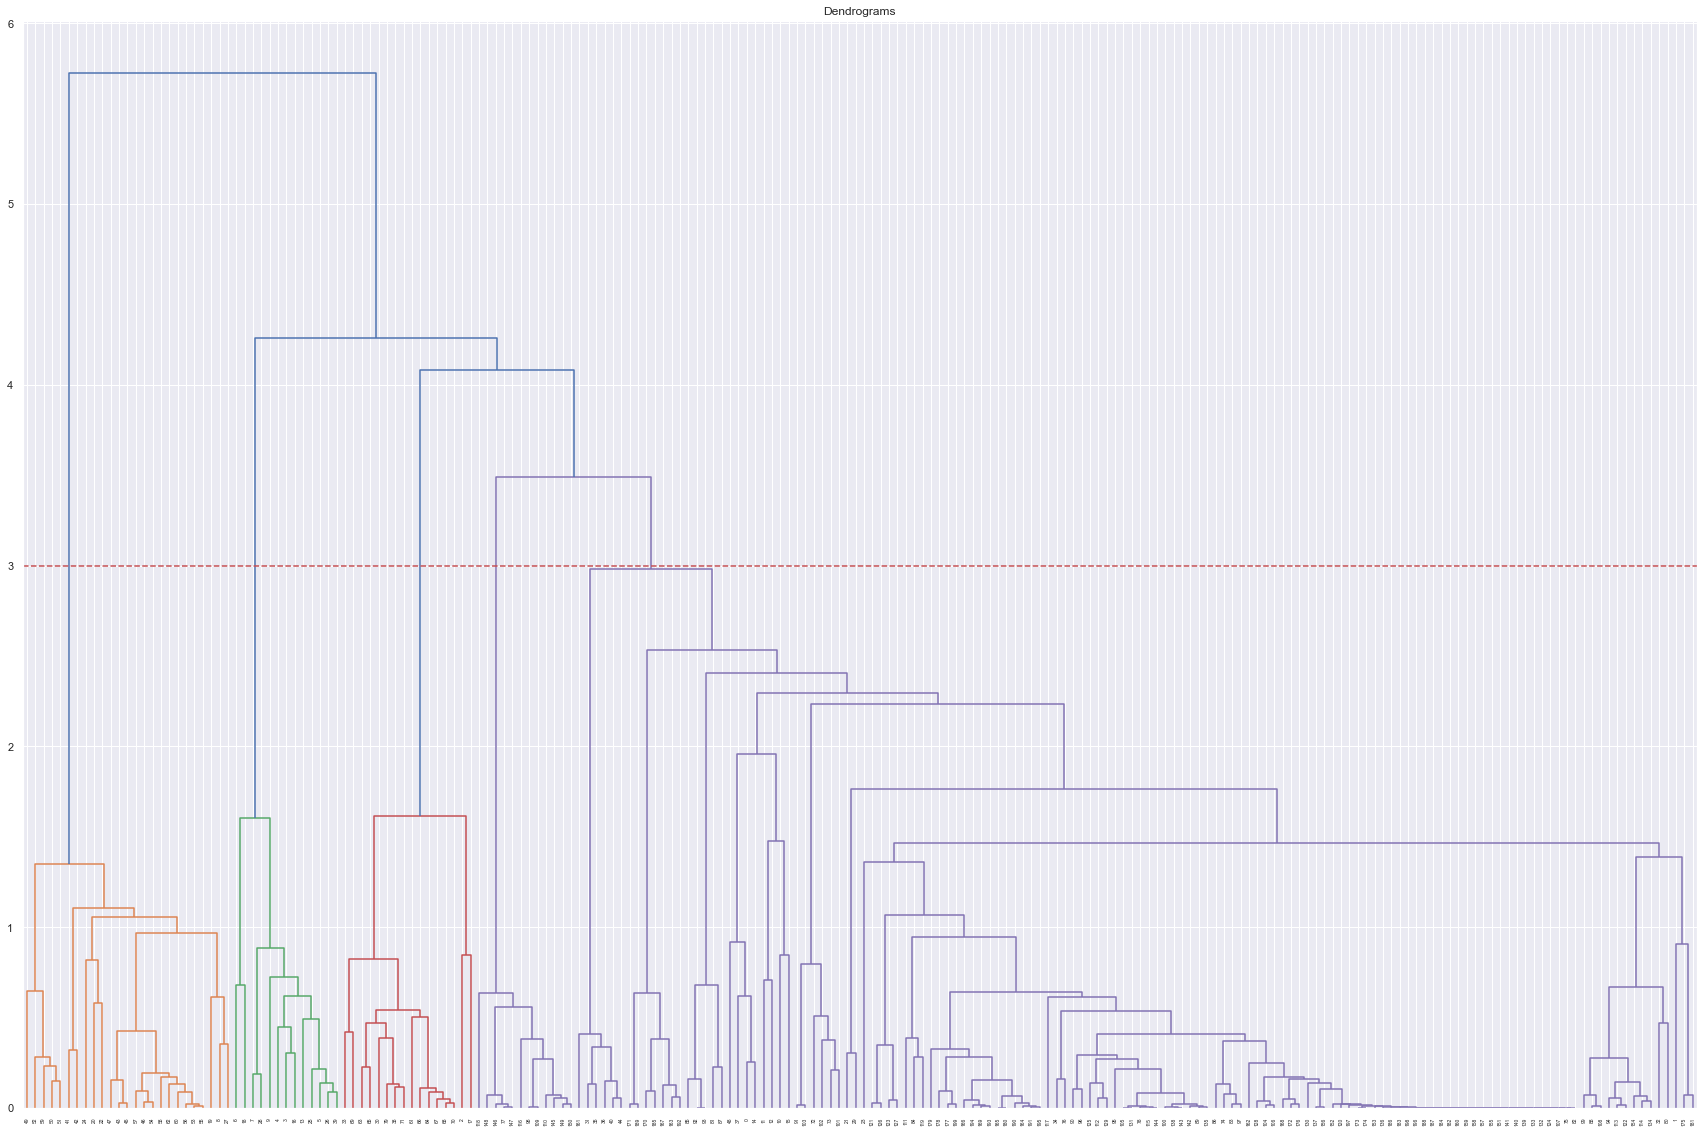

In [1660]:
# Ready to compute Dendrogram and check the best distances, or number of clusters which would better represents my data
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(travel_to_cluster, method='ward'))
plt.axhline(y= 3, color='r', linestyle='--')

Visually inspecting the dendograms, I set the best cut on the distance = 3.5 and trace the line, approximately will group the data on 4 clusters.

In [1317]:
#create the model that we want, setting the linkage to ward, the distance threshold to 3 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
from sklearn.cluster import AgglomerativeClustering
model3= AgglomerativeClustering(linkage="ward",  distance_threshold = 3,
                                 n_clusters= None)
#fit the model to the data
model3.fit(travel_to_cluster)

AgglomerativeClustering(distance_threshold=3, n_clusters=None)

In [1403]:
model3.labels_

array([0, 0, 1, 2, 2, 2, 2, 2, 3, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 3, 3, 0,
       3, 0, 3, 2, 2, 3, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 3, 3, 3,
       0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [1319]:
#assign the labels back to the dataset
data_scaled_travel["clusters_5"] = model3.labels_
data_scaled_travel

,Distances,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,clusters_5
0,0.000012,0.000000,0.000000,0.000000,0.005028,0.012410,0.000000,0.014550,0.001498,0.981042,...,0.000000,0.000000,0.020755,0.0,0.0,0.055097,0.003851,0.0,0.000000,0
1,0.000419,0.125221,0.000000,0.110585,0.000000,0.000000,0.016262,0.396804,0.000000,0.000000,...,0.008944,0.622039,0.113837,0.0,0.0,0.135792,0.000000,0.0,0.000000,0
2,0.002162,0.106893,0.000000,0.000000,0.000000,0.000000,0.660637,0.000000,0.000000,0.000000,...,0.000000,0.085865,0.380260,0.0,0.0,0.000000,0.178740,0.0,0.000000,1
3,0.003412,0.914662,0.000000,0.000000,0.000000,0.000000,0.223127,0.000000,0.000000,0.014242,...,0.033232,0.112355,0.064881,0.0,0.0,0.003165,0.049056,0.0,0.000000,2
4,0.002890,0.930493,0.022896,0.000000,0.000000,0.000916,0.108985,0.000000,0.000000,0.000916,...,0.000000,0.000000,0.148366,0.0,0.0,0.086089,0.022896,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.989169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.146781,0
196,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0
197,0.999940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.010995,0
198,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0


In [1320]:
# Rename the columns with the number of participants. This is to Plot my Data

data_renamed_travel = data_scaled_travel.rename(columns={0:'part_1',1:'part_2', 2:'part_3',3:'part_4',4:'part_5',5:'part_6',6:'part_7',7:'part_8',8:'part_9',9:'part_10',
                            10:'part_11',11:'part_12',12:'part_13',13:'part_14',14:'part_15',15:'part_16',16:'part_17', 17:'part_18', 18:'part_19', 19:'part_20',20:'part_21',21:'part_22',
                                                         22:'part_23',23:'part_24',24:'part_25',25:'part_26',26:'part_27',27:'part_28',
                           28:'part_29',29:'part_30',30:'part_31',31:'part_32',32:'part_33',33:'part_34',34:'part_35'})
data_renamed_travel

,Distances,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8,part_9,...,part_27,part_28,part_29,part_30,part_31,part_32,part_33,part_34,part_35,clusters_5
0,0.000012,0.000000,0.000000,0.000000,0.005028,0.012410,0.000000,0.014550,0.001498,0.981042,...,0.000000,0.000000,0.020755,0.0,0.0,0.055097,0.003851,0.0,0.000000,0
1,0.000419,0.125221,0.000000,0.110585,0.000000,0.000000,0.016262,0.396804,0.000000,0.000000,...,0.008944,0.622039,0.113837,0.0,0.0,0.135792,0.000000,0.0,0.000000,0
2,0.002162,0.106893,0.000000,0.000000,0.000000,0.000000,0.660637,0.000000,0.000000,0.000000,...,0.000000,0.085865,0.380260,0.0,0.0,0.000000,0.178740,0.0,0.000000,1
3,0.003412,0.914662,0.000000,0.000000,0.000000,0.000000,0.223127,0.000000,0.000000,0.014242,...,0.033232,0.112355,0.064881,0.0,0.0,0.003165,0.049056,0.0,0.000000,2
4,0.002890,0.930493,0.022896,0.000000,0.000000,0.000916,0.108985,0.000000,0.000000,0.000916,...,0.000000,0.000000,0.148366,0.0,0.0,0.086089,0.022896,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.989169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.146781,0
196,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0
197,0.999940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.010995,0
198,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0


In [1321]:
#extract the columns that we don't want to plot
not_plot_renamed_t = ['Distances','clusters_5']
#use this to extract the columns that we do want to plot
to_plot_renamed_t = [col for col in data_renamed_travel.columns if col not in not_plot_renamed_t]
#extract the values that we want to plot
data_t_plot = data_renamed_travel[to_plot_renamed_t]


In [1322]:
# VISUALISING AND INSPECTING THE CLUSTERS 
#extract the table showing the summary results
agglom_means_t =data_renamed_travel.groupby("clusters_5")[to_plot_renamed_t].mean()
agglom_means_T_t = agglom_means_t.T.round(3)

#turn this into a dataframe
agglom_means_T_t = pd.DataFrame(agglom_means_T_t)
#show the results
agglom_means_T_t

clusters_5,0,1,2,3,4
part_1,0.009,0.007,0.851,0.026,0.000
part_2,0.001,0.000,0.002,0.008,0.000
part_3,0.005,0.006,0.000,0.090,0.000
part_4,0.000,0.000,0.000,0.000,0.000
part_5,0.000,0.000,0.000,0.000,0.000
part_6,0.011,0.752,0.081,0.062,0.000
part_7,0.051,0.011,0.008,0.010,0.788
part_8,0.000,0.000,0.000,0.000,0.000
part_9,0.028,0.029,0.054,0.054,0.000
part_10,0.008,0.000,0.022,0.006,0.000


/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2541345264.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2541345264.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2541345264.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2541345264.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2541345264.py:20: UserWarni

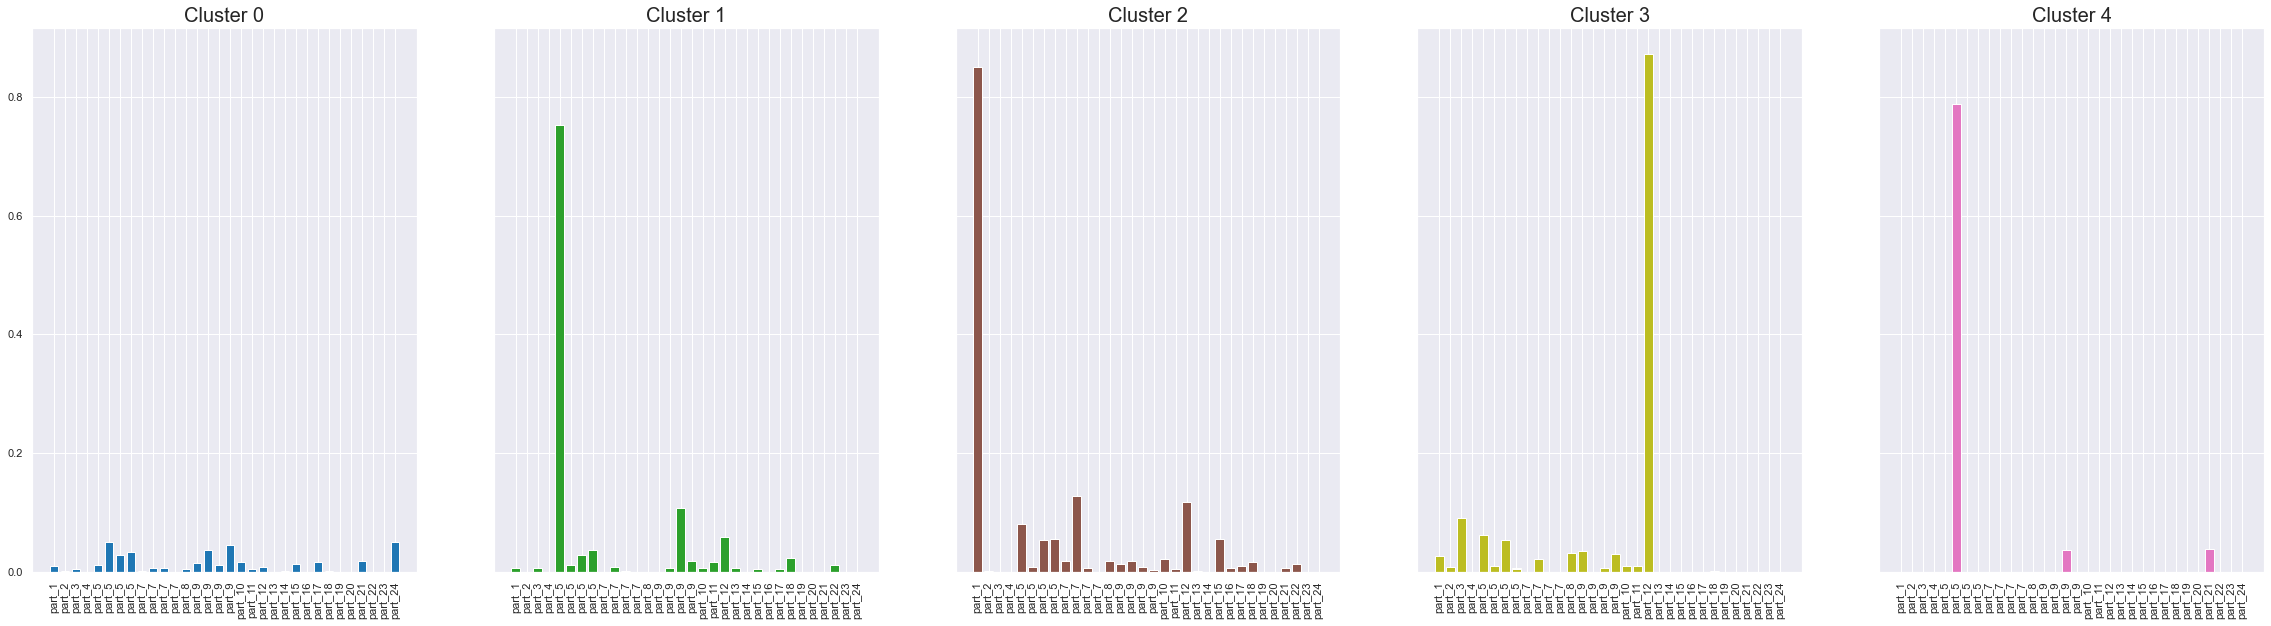

In [1323]:
#reset the index
agglom_means_T_t.reset_index(inplace=True)

#get the colours
colors = ["#1f77b4", "#2ca02c", "#8c564b", "tab:olive", "tab:pink"]

#create subplots for each cluster
fig, ax = plt.subplots(1,5, figsize = (40,10), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 20)

Here you can see how many participants are contributing to each cluster, a peak of some participants.

In [ ]:
# Visualise the data over the distances  # Quick display for som part how data are clustered

In [1365]:
 a = sns.set(rc = {'figure.figsize':(15,18)})

<AxesSubplot:xlabel='Distances', ylabel='part_4'>

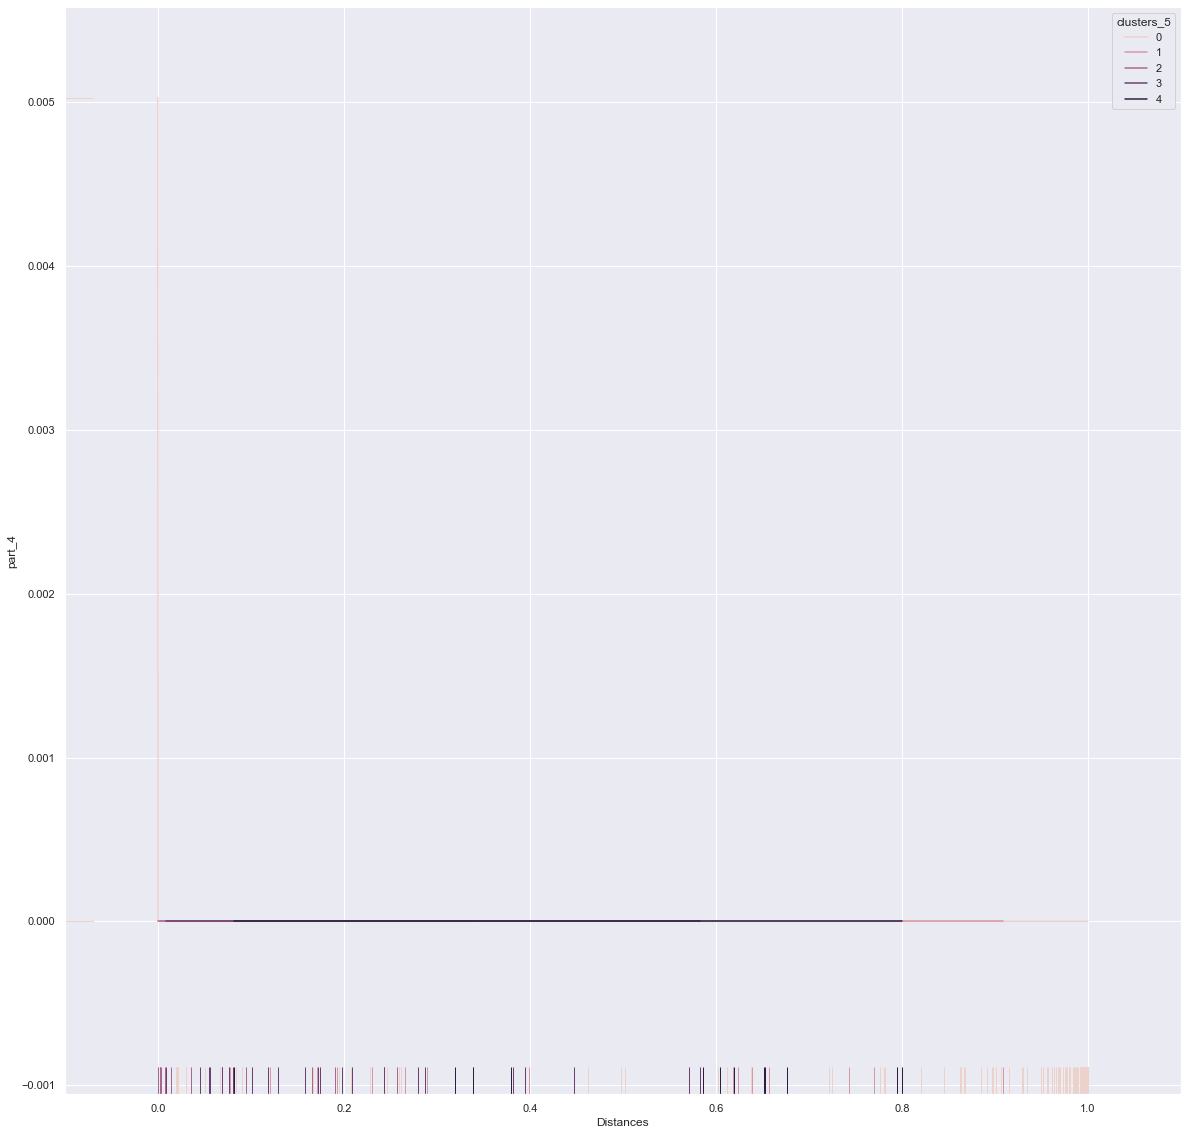

In [1385]:

 a = sns.lineplot(
    x='Distances',
    y= 'part_4', 
    data=data_renamed_travel,
    hue='clusters_5',); sns.rugplot(data=data_renamed_travel, x="Distances", y="part_4", hue= 'clusters_5')


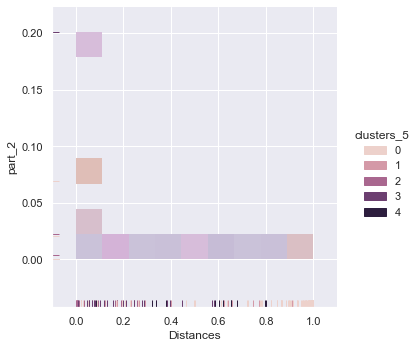

In [1383]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.displot(x='Distances',
    y= 'part_2', 
    data=data_renamed_travel,
    hue='clusters_5',
    rug=True)
     

We do now the same thiing for other for our map category

In [1387]:
maps_wide

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Distances,,,,,,,,,,,,,,,,,,,,,
0.114,0.0,0.0,0.0,76.0,13.0,0.0,0.0,3.0,876.0,38.0,...,0.0,0.0,0.0,268.0,0.0,0.0,151.0,14.0,0.0,0.0
0.515,38.0,0.0,0.0,49.0,0.0,12.0,0.0,0.0,0.0,97.0,...,0.0,0.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2335,0.0,0.0,0.0,5.0,0.0,15.0,0.0,0.0,4.0,0.0,...,123.0,0.0,0.0,30.0,0.0,0.0,0.0,13.0,0.0,0.0
2.1559999999999997,316.0,0.0,0.0,27.0,0.0,57.0,0.0,0.0,7.0,0.0,...,449.0,0.0,39.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0
3.1555,770.0,0.0,0.0,14.0,0.0,17.0,0.0,20.0,3.0,0.0,...,58.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347.8139999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226.0
1355.0355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1364.1779999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1388]:
maps_wide = maps_wide.reset_index()

In [1389]:
maps_wide

,Distances,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0.1140,0.0,0.0,0.0,76.0,13.0,0.0,0.0,3.0,876.0,...,0.0,0.0,0.0,268.0,0.0,0.0,151.0,14.0,0.0,0.0
1,0.5150,38.0,0.0,0.0,49.0,0.0,12.0,0.0,0.0,0.0,...,0.0,0.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.2335,0.0,0.0,0.0,5.0,0.0,15.0,0.0,0.0,4.0,...,123.0,0.0,0.0,30.0,0.0,0.0,0.0,13.0,0.0,0.0
3,2.1560,316.0,0.0,0.0,27.0,0.0,57.0,0.0,0.0,7.0,...,449.0,0.0,39.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0
4,3.1555,770.0,0.0,0.0,14.0,0.0,17.0,0.0,20.0,3.0,...,58.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1347.8140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226.0
196,1355.0355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
197,1364.1780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,1374.6385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [1390]:
# Normalise Data
from sklearn.preprocessing import normalize
data_scaled_1 = normalize(maps_wide)
data_scaled_maps = pd.DataFrame(data_scaled_1, columns=maps_wide.columns)
data_scaled_maps

,Distances,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0.000109,0.000000,0.0,0.0,0.072831,0.012458,0.000000,0.0,0.002875,0.839468,...,0.000000,0.0,0.000000,0.256824,0.0,0.0,0.144703,0.013416,0.0,0.000000
1,0.000959,0.070796,0.0,0.0,0.091290,0.000000,0.022357,0.0,0.000000,0.000000,...,0.000000,0.0,0.961340,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.008889,0.000000,0.0,0.0,0.036032,0.000000,0.108097,0.0,0.000000,0.028826,...,0.886395,0.0,0.000000,0.216194,0.0,0.0,0.000000,0.093684,0.0,0.000000
3,0.003854,0.564900,0.0,0.0,0.048267,0.000000,0.101896,0.0,0.000000,0.012514,...,0.802658,0.0,0.069719,0.000000,0.0,0.0,0.084020,0.000000,0.0,0.000000
4,0.004008,0.977922,0.0,0.0,0.017780,0.000000,0.021590,0.0,0.025401,0.003810,...,0.073662,0.0,0.000000,0.000000,0.0,0.0,0.068582,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.986232,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.165370
196,0.999973,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.007380
197,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
198,0.999983,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.005820


In [1391]:
#extract the columns that we don't want to plot # Distances do not want to be included in our clustering algorithms.
not_plot_ = ['Distances']
#use this to extract the columns that we do want to cluster
to_plot_ = [col for col in data_scaled_maps.columns if col not in not_plot_]
#extract the values that we want to cluster
maps_to_cluster = data_scaled_maps[to_plot_]
maps_to_cluster

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.0,0.0,0.072831,0.012458,0.000000,0.0,0.002875,0.839468,0.036415,...,0.000000,0.0,0.000000,0.256824,0.0,0.0,0.144703,0.013416,0.0,0.000000
1,0.070796,0.0,0.0,0.091290,0.000000,0.022357,0.0,0.000000,0.000000,0.180717,...,0.000000,0.0,0.961340,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.0,0.036032,0.000000,0.108097,0.0,0.000000,0.028826,0.000000,...,0.886395,0.0,0.000000,0.216194,0.0,0.0,0.000000,0.093684,0.0,0.000000
3,0.564900,0.0,0.0,0.048267,0.000000,0.101896,0.0,0.000000,0.012514,0.000000,...,0.802658,0.0,0.069719,0.000000,0.0,0.0,0.084020,0.000000,0.0,0.000000
4,0.977922,0.0,0.0,0.017780,0.000000,0.021590,0.0,0.025401,0.003810,0.000000,...,0.073662,0.0,0.000000,0.000000,0.0,0.0,0.068582,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.165370
196,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.007380
197,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
198,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.005820


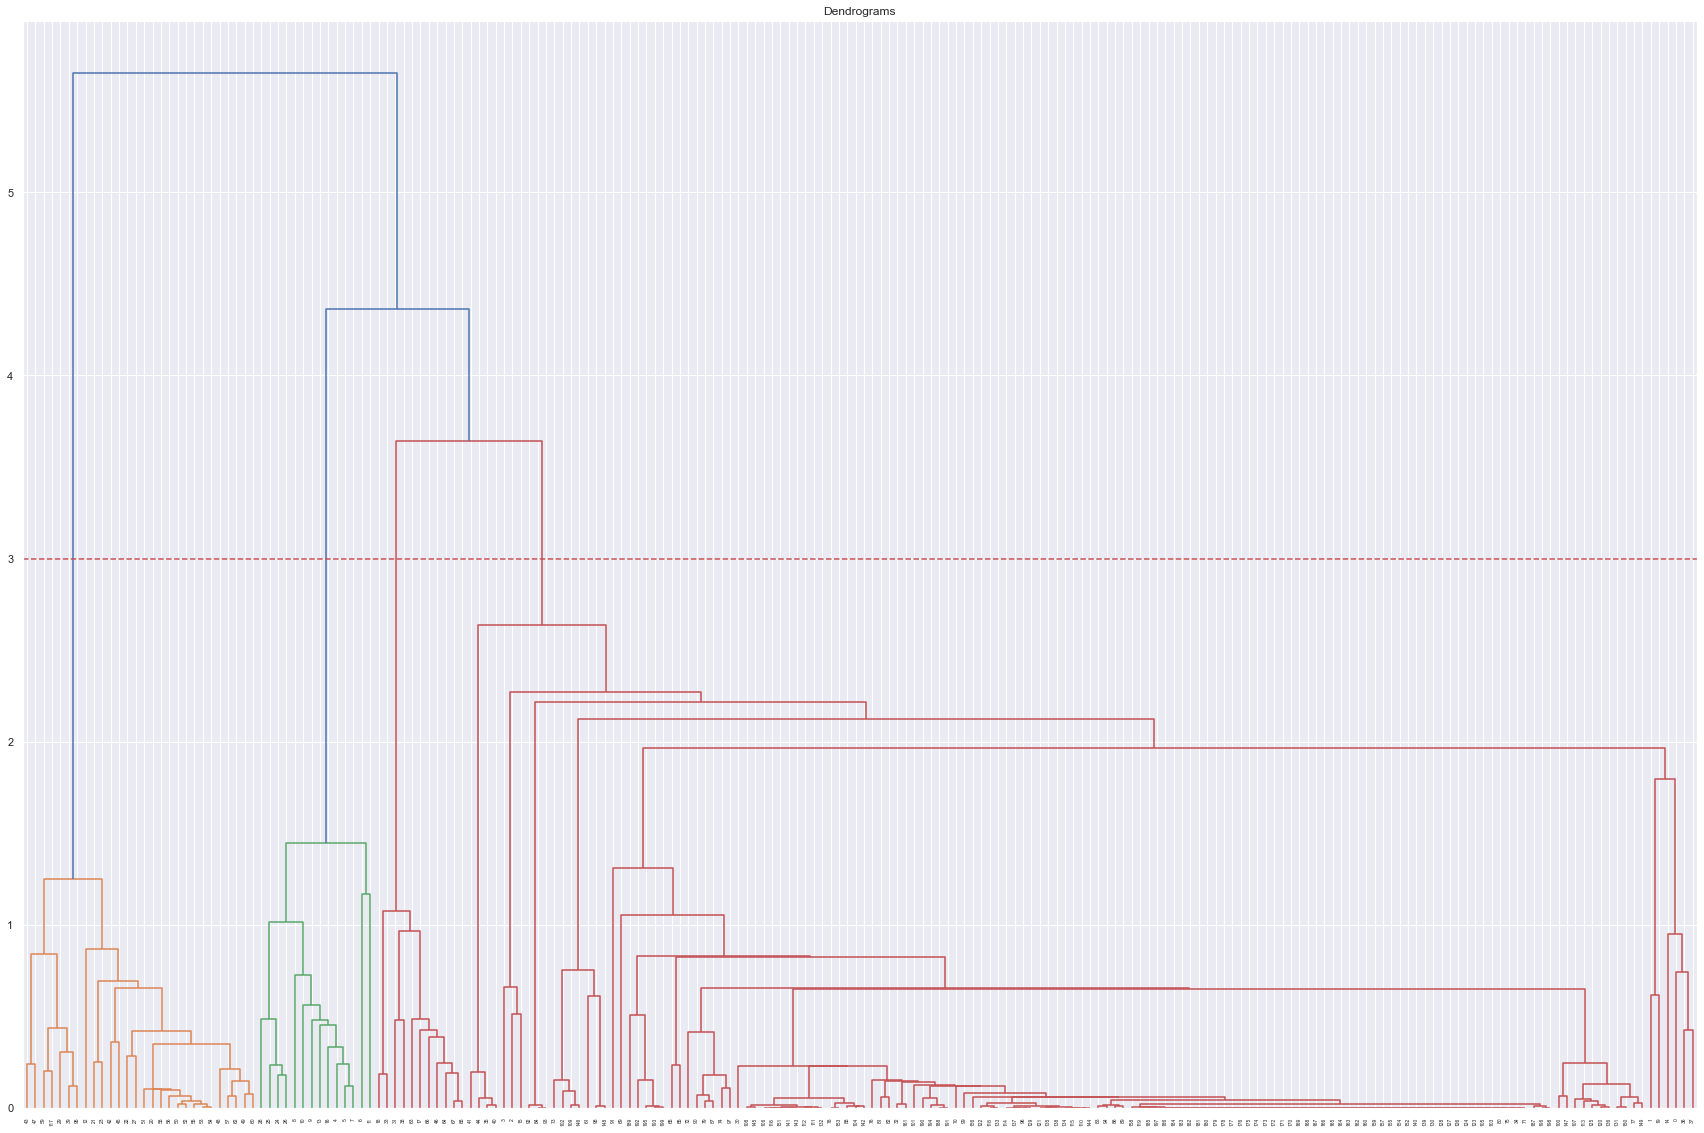

In [1606]:
# Ready to compute Dendrogram and check the best distances, or number of clusters which would better represents my data
#import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(maps_to_cluster, method='ward'))
plt.axhline(y= 3, color='r', linestyle='--')

In [1607]:
#create the model that we want, setting the linkage to ward, the distance threshold to 3 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
from sklearn.cluster import AgglomerativeClustering
model4= AgglomerativeClustering(linkage="ward",  distance_threshold = 3,
                                 n_clusters= None)
#fit the model to the data
model4.fit(maps_to_cluster)

AgglomerativeClustering(distance_threshold=3, n_clusters=None)

In [1608]:
model4.labels_

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 3, 3, 0, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1,
       0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 3, 0,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [1609]:
#assign the labels back to the dataset
data_scaled_maps["clusters_4"] = model4.labels_
data_scaled_maps

,Distances,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,clusters_4
0,0.000109,0.000000,0.0,0.0,0.072831,0.012458,0.000000,0.0,0.002875,0.839468,...,0.0,0.000000,0.256824,0.0,0.0,0.144703,0.013416,0.0,0.000000,0
1,0.000959,0.070796,0.0,0.0,0.091290,0.000000,0.022357,0.0,0.000000,0.000000,...,0.0,0.961340,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0
2,0.008889,0.000000,0.0,0.0,0.036032,0.000000,0.108097,0.0,0.000000,0.028826,...,0.0,0.000000,0.216194,0.0,0.0,0.000000,0.093684,0.0,0.000000,0
3,0.003854,0.564900,0.0,0.0,0.048267,0.000000,0.101896,0.0,0.000000,0.012514,...,0.0,0.069719,0.000000,0.0,0.0,0.084020,0.000000,0.0,0.000000,0
4,0.004008,0.977922,0.0,0.0,0.017780,0.000000,0.021590,0.0,0.025401,0.003810,...,0.0,0.000000,0.000000,0.0,0.0,0.068582,0.000000,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.986232,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.165370,0
196,0.999973,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.007380,0
197,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0
198,0.999983,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.005820,0


In [1610]:
# Rename the columns with the number of participants. This is to Plot my Data

data_renamed_maps = data_scaled_maps.rename(columns={0:'part_1',1:'part_2', 2:'part_3',3:'part_4',4:'part_5',5:'part_6',6:'part_7',7:'part_8',8:'part_9',9:'part_10',
                            10:'part_11',11:'part_12',12:'part_13',13:'part_14',14:'part_15',15:'part_16',16:'part_17', 17:'part_18', 18:'part_19', 19:'part_20',20:'part_21',21:'part_22',
                                                         22:'part_23',23:'part_24',24:'part_25',25:'part_26',26:'part_27',27:'part_28',
                           28:'part_29',29:'part_30',30:'part_31',31:'part_32',32:'part_33',33:'part_34',34:'part_35'})
data_renamed_maps

,Distances,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8,part_9,...,part_27,part_28,part_29,part_30,part_31,part_32,part_33,part_34,part_35,clusters_4
0,0.000109,0.000000,0.0,0.0,0.072831,0.012458,0.000000,0.0,0.002875,0.839468,...,0.0,0.000000,0.256824,0.0,0.0,0.144703,0.013416,0.0,0.000000,0
1,0.000959,0.070796,0.0,0.0,0.091290,0.000000,0.022357,0.0,0.000000,0.000000,...,0.0,0.961340,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0
2,0.008889,0.000000,0.0,0.0,0.036032,0.000000,0.108097,0.0,0.000000,0.028826,...,0.0,0.000000,0.216194,0.0,0.0,0.000000,0.093684,0.0,0.000000,0
3,0.003854,0.564900,0.0,0.0,0.048267,0.000000,0.101896,0.0,0.000000,0.012514,...,0.0,0.069719,0.000000,0.0,0.0,0.084020,0.000000,0.0,0.000000,0
4,0.004008,0.977922,0.0,0.0,0.017780,0.000000,0.021590,0.0,0.025401,0.003810,...,0.0,0.000000,0.000000,0.0,0.0,0.068582,0.000000,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.986232,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.165370,0
196,0.999973,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.007380,0
197,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0
198,0.999983,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.005820,0


In [1611]:
#extract the columns that we don't want to plot
not_plot_renamed_m = ['Distances','clusters_4']
#use this to extract the columns that we do want to plot
to_plot_renamed_m = [col for col in data_renamed_maps.columns if col not in not_plot_renamed_m]
#extract the values that we want to plot
data_t_plot_m = data_renamed_maps[to_plot_renamed_m]
data_t_plot_m

,part_1,part_2,part_3,part_4,part_5,part_6,part_7,part_8,part_9,part_10,...,part_26,part_27,part_28,part_29,part_30,part_31,part_32,part_33,part_34,part_35
0,0.000000,0.0,0.0,0.072831,0.012458,0.000000,0.0,0.002875,0.839468,0.036415,...,0.000000,0.0,0.000000,0.256824,0.0,0.0,0.144703,0.013416,0.0,0.000000
1,0.070796,0.0,0.0,0.091290,0.000000,0.022357,0.0,0.000000,0.000000,0.180717,...,0.000000,0.0,0.961340,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.0,0.036032,0.000000,0.108097,0.0,0.000000,0.028826,0.000000,...,0.886395,0.0,0.000000,0.216194,0.0,0.0,0.000000,0.093684,0.0,0.000000
3,0.564900,0.0,0.0,0.048267,0.000000,0.101896,0.0,0.000000,0.012514,0.000000,...,0.802658,0.0,0.069719,0.000000,0.0,0.0,0.084020,0.000000,0.0,0.000000
4,0.977922,0.0,0.0,0.017780,0.000000,0.021590,0.0,0.025401,0.003810,0.000000,...,0.073662,0.0,0.000000,0.000000,0.0,0.0,0.068582,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.165370
196,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.007380
197,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
198,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.005820


In [1771]:
# VISUALISING AND INSPECTING THE CLUSTERS 
#extract the table showing the summary results
agglom_means_m =data_renamed_maps.groupby("clusters_4")[to_plot_renamed_m].mean()
agglom_means_T_m = agglom_means_m.T.round(3)

#turn this into a dataframe
agglom_means_T_m = pd.DataFrame(agglom_means_T_m)
#show the results
agglom_means_T_m

clusters_4,0,1,2,3
part_1,0.007,0.029,0.847,0.032
part_2,0.000,0.000,0.038,0.000
part_3,0.000,0.008,0.000,0.000
part_4,0.004,0.004,0.003,0.007
part_5,0.000,0.000,0.000,0.000
part_6,0.005,0.020,0.036,0.795
part_7,0.046,0.000,0.000,0.000
part_8,0.000,0.000,0.002,0.000
part_9,0.021,0.014,0.041,0.000
part_10,0.005,0.010,0.034,0.000


/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/3335958645.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_m["index"], rotation = 90,fontsize=20)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/3335958645.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_m["index"], rotation = 90,fontsize=20)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/3335958645.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_m["index"], rotation = 90,fontsize=20)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/3335958645.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_m["index"], rotation = 90,fontsize=20)


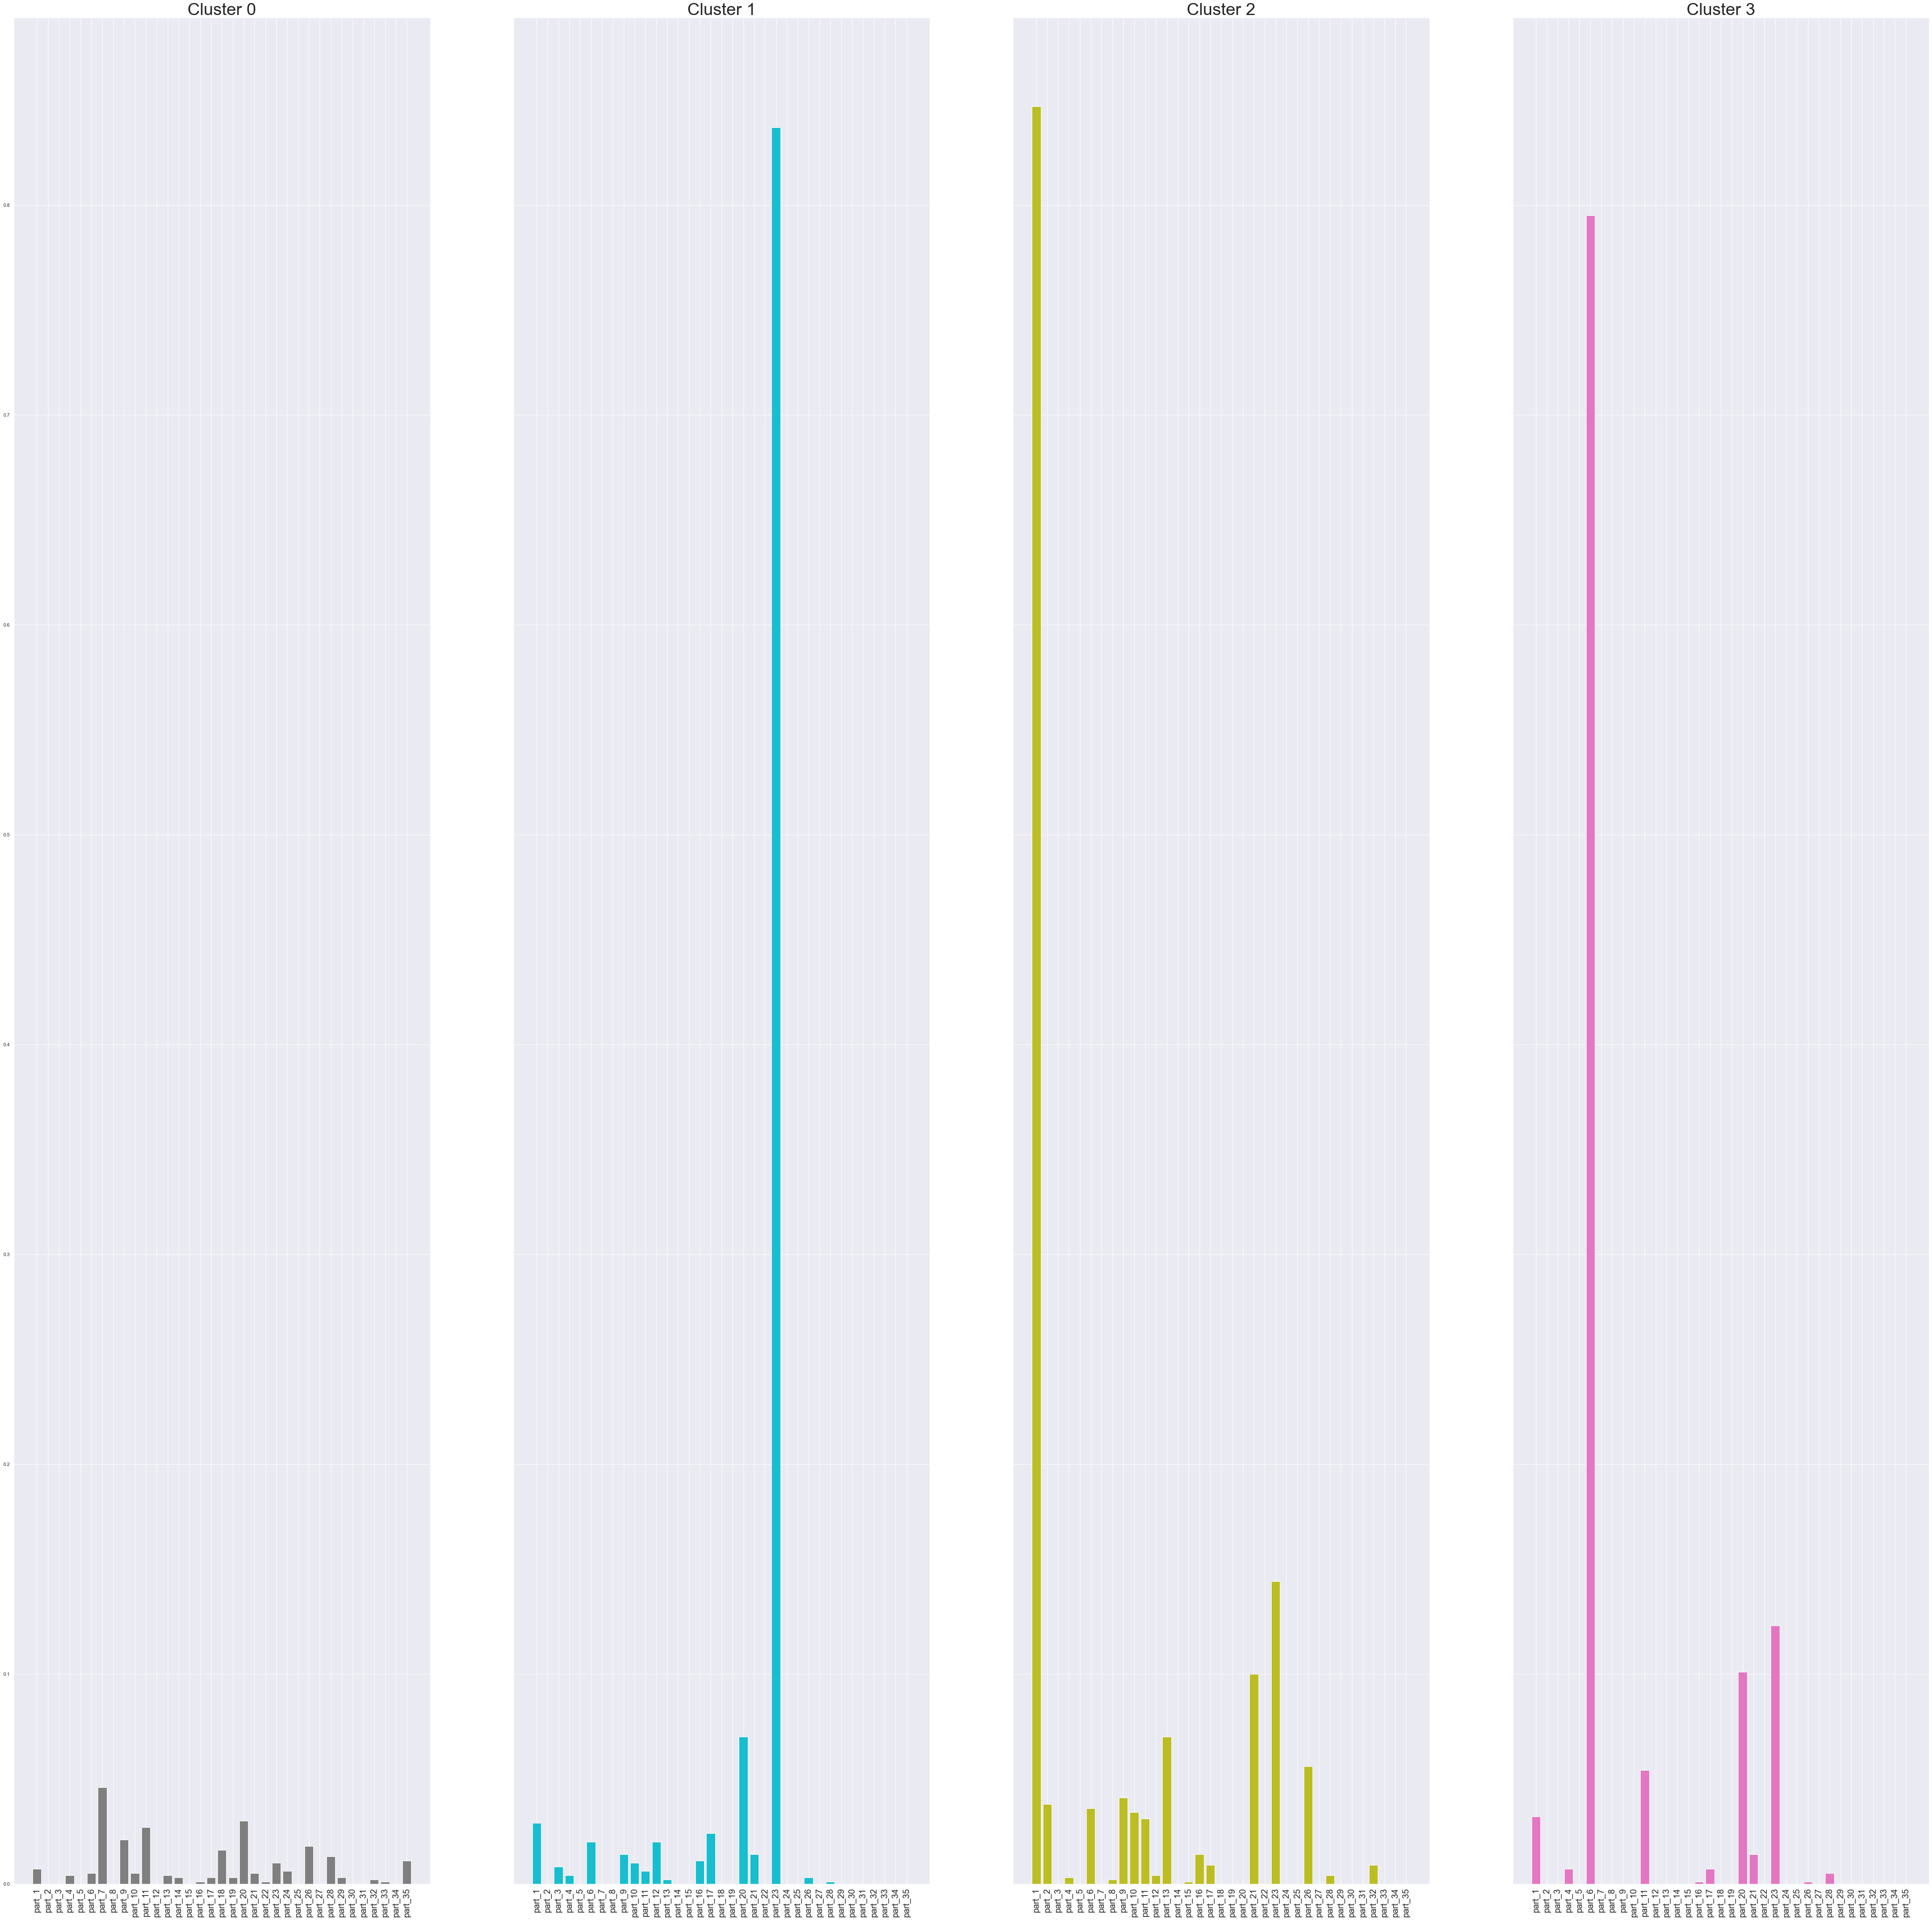

In [1772]:
#reset the index
agglom_means_T_m.reset_index(inplace=True)

#get the colours
colors = ["tab:grey", "tab:cyan", "tab:olive", "tab:pink"]

#create subplots for each cluster
fig, ax = plt.subplots(1,4, figsize = (80,80), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T_m.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T_m[col], x=agglom_means_T_m["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T_m["index"], rotation = 90,fontsize=20)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 40)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


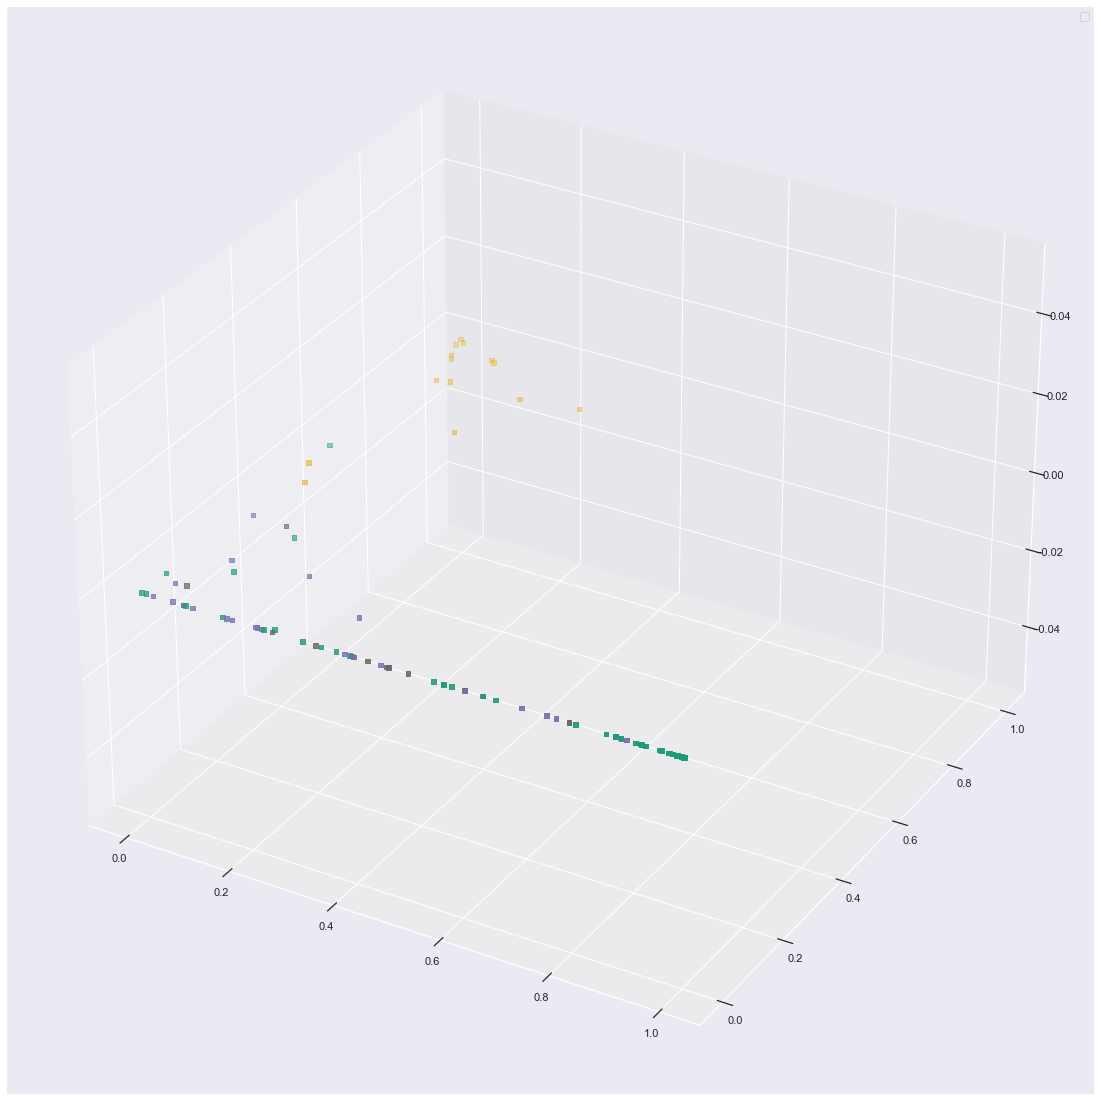

In [1633]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

 
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')
ax.legend()
x = np.array(data_renamed_maps['Distances'])
y = np.array(data_renamed_maps['part_1'])
z = np.array(data_renamed_maps['part_25'])

ax.scatter(x,y,z, marker="s", c=data_renamed_maps["clusters_4"], cmap = 'Dark2')

plt.show()


<AxesSubplot:xlabel='Distances', ylabel='part_23'>

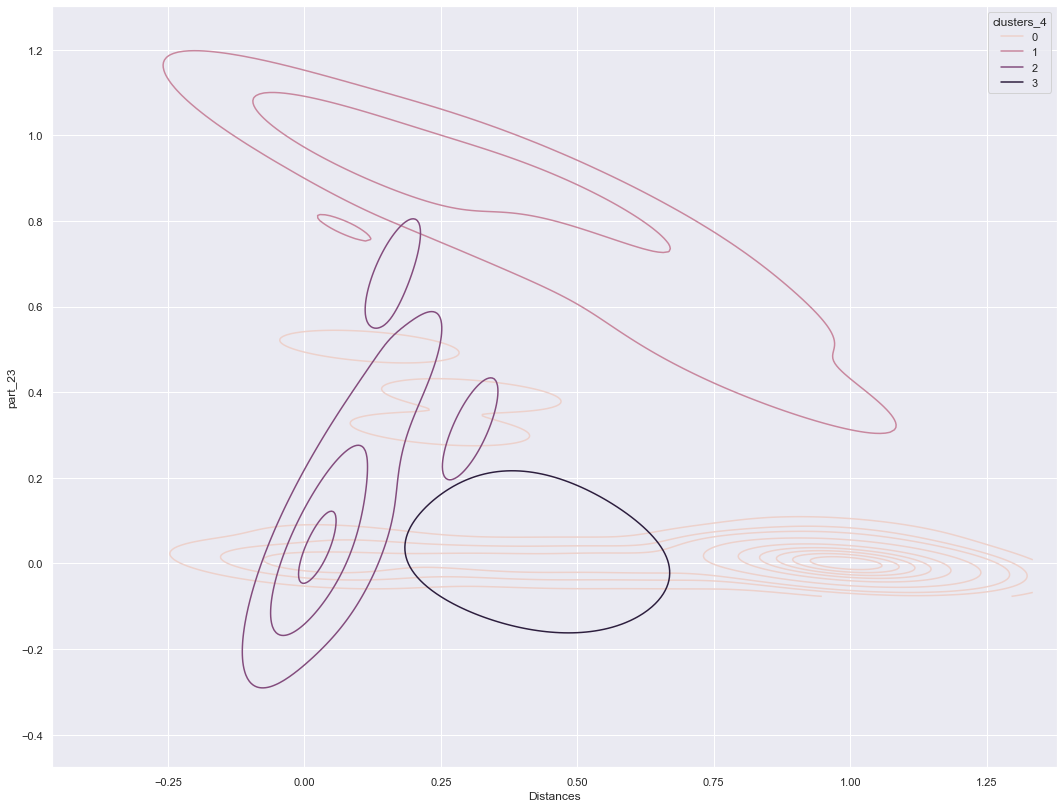

In [1428]:
sns.kdeplot( x='Distances',
    y= 'part_23', 
    data=data_renamed_maps,
    hue='clusters_4')

Now CHeck if there is any correlation between these clusters with the distances from home (Median Values)

In [1432]:
#Hot_encoding for the cluster column
y_200map = pd.get_dummies(data_renamed_maps.clusters_4)
y_200travel = pd.get_dummies(data_renamed_travel.clusters_5)


In [1433]:
y_200map['Distance'] = data_renamed_maps['Distances']
y_200travel['Distance']= data_renamed_travel['Distances']

In [ ]:
# Check distribution, normalization does not assume normal distribution of the data 

In [1454]:
from scipy import stats
k2, p = stats.normaltest(y_200map)
print (p)


[5.78009986e-11 6.70475955e-19 2.31440817e-35 5.88758556e-41
 4.20549497e-09]


In [1455]:
from scipy import stats
k2, p = stats.normaltest(y_200travel)
print (p)

[0.00000000e+00 3.09448977e-32 4.35439041e-37 1.28932905e-21
 6.05158530e-39 4.84150577e-94]


In [1456]:
#Data are normaly distributed p< 0.05 pearson correlation is enough

In [1485]:
y_200map.corr()

,0,1,2,3,Distance
0,1.000000,-0.671948,-0.456907,-0.401778,0.720332
1,-0.671948,1.000000,-0.110694,-0.097338,-0.412852
2,-0.456907,-0.110694,1.000000,-0.066187,-0.488739
3,-0.401778,-0.097338,-0.066187,1.000000,-0.219106
Distance,0.720332,-0.412852,-0.488739,-0.219106,1.000000


In [1486]:
y_200travel.corr()

,cluster_0,cluster_1,cluster_2,cluster_3,4,Distance
cluster_0,1.000000,-0.420176,-0.375691,-0.538557,-0.359991,0.648775
cluster_1,-0.420176,1.000000,-0.077750,-0.111456,-0.074501,-0.177152
cluster_2,-0.375691,-0.077750,1.000000,-0.099656,-0.066614,-0.387349
cluster_3,-0.538557,-0.111456,-0.099656,1.000000,-0.095491,-0.437678
4,-0.359991,-0.074501,-0.066614,-0.095491,1.000000,-0.070581
Distance,0.648775,-0.177152,-0.387349,-0.437678,-0.070581,1.000000


In [1473]:
y_200travel.rename(columns={0:'cluster_0',1:'cluster_1',2:'cluster_2',3:'cluster_3'},inplace= True)

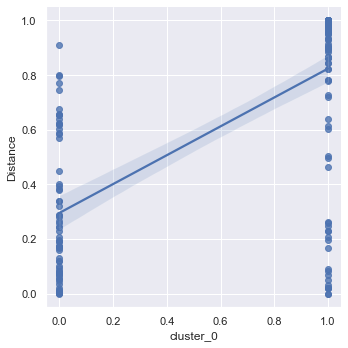

In [1475]:
sns.lmplot(x="cluster_0", y="Distance", data=y_200travel);

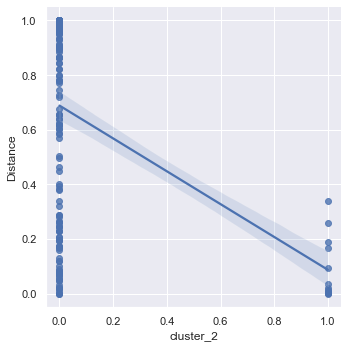

In [1476]:
sns.lmplot(x="cluster_2", y="Distance", data=y_200travel);

It looks like that for some clusters there is a positive correlation in which taps increase when distances increases. This is not always true for all clusters. Most of them are instead correlated negatively. This means that for some clusters of behaviour applications for maps and navigation and travels are are mostly  used the more you go far from home, whereas for other the trends is inverse. Staing home tapping could mean planning, and not so many taps but still far from home could be justified as an active navigation where the phone is used but only to listen check
(time is needed to verify) and other categories should be clustered in order to understand if the behavioural trens is kept with other categories.

 # APPENDIX

My Initial work, started with exploring all categories together to perform HCA. However, it was creating too much noise and not optimally working. I have  tried for 500 bins, here still keep the 200 to show.

Here I report all the other analysis I have been doing, before picking the ones which are the most meaningful and match best my research questions.

1. HCA on the number of taps aggregated around the 500 bins of the home location. Here I did not have any info on the participants, so the final clustering was only based on quantity of taps and how they are displayed over the distances from home:
 - On all categories
 - Just on Maps Taps
 - Just on Travel
 - Combining Maps and Travels
 

1. All Categories


In [ ]:
# Computed the 200 bins for the all categories dataset

In [1487]:
# Look for the path where the csv files are stored and read them with Pandas
data_folder = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data')
data  = pd.read_csv(data_folder/'final_dataset_cleaned.csv', skip_blank_lines=True, index_col=None, header='infer')

In [1489]:
# Dropping some dummy columns created during the upload of the csv
data = data.drop('Unnamed: 0',axis= 1)
data

,index,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,138e51f689797029401d90cbec9775656b1628eb,4.221436,0,0,0,0,73,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,138e51f689797029401d90cbec9775656b1628eb,4.223657,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,138e51f689797029401d90cbec9775656b1628eb,4.215908,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,138e51f689797029401d90cbec9775656b1628eb,4.236142,0,0,0,0,1,134,0,0,...,0,0,0,0,0,0,0,0,0,0
4,138e51f689797029401d90cbec9775656b1628eb,4.222005,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72167,138e78a79ad1ab1d4372845daa5a80f28b2028eb,1337.423198,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
72168,138e78a79ad1ab1d4372845daa5a80f28b2028eb,1337.421957,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
72169,138e78a79ad1ab1d4372845daa5a80f28b2028eb,1337.422701,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72170,138e78a79ad1ab1d4372845daa5a80f28b2028eb,1337.421442,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1490]:
# Index the participants, getting rid of the participant code. It is an extra, not adding any values
list_part = list(data['index'].unique())

for i, n in enumerate(list_part):
    #print(i)
    data.loc[(data['index']== n), 'index'] = i

In [1491]:
data

,index,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,0,4.221436,0,0,0,0,73,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4.223657,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4.215908,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4.236142,0,0,0,0,1,134,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.222005,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72167,34,1337.423198,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
72168,34,1337.421957,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
72169,34,1337.422701,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72170,34,1337.421442,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1492]:
# Compute Bins
data['home_distance_bins'] = pd.cut(data['home_distance'],bins=jenkspy.jenks_breaks
                                          (data['home_distance'], n_classes=200),include_lowest=True)

In [1495]:
aggregated_data = data.groupby(['home_distance_bins']).sum()

In [1497]:
# Reset the index
aggregated_data.reset_index(inplace=True)

In [1498]:
#Compute the median values from each bins in each row and assign it to a new column called Median_Distances
aggregated_data["Median_Distances"] = aggregated_data["home_distance_bins"].apply(lambda x: x.mid)
aggregated_data

,home_distance_bins,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,...,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps,Median_Distances
0,"(-0.001, 0.229]",214.921287,2237,13633,32945,0,35668,331106,153404,247362,...,2673,7712,17214,113184,1687,1815,5136,695,11729,0.1140
1,"(0.229, 0.801]",2144.372258,879,3468,8646,0,10164,137527,5316,79252,...,3236,2413,3670,76294,7824,2993,1269,1506,392,0.5150
2,"(0.801, 1.666]",903.259685,296,1311,1188,0,1096,18205,679,4363,...,63,640,315,134,218,528,45,42,0,1.2335
3,"(1.666, 2.646]",2525.240007,1040,1250,8177,0,2049,41698,8246,2293,...,0,486,1461,1960,386,53,18,62,324,2.1560
4,"(2.646, 3.665]",6148.928663,1080,2121,12956,0,5709,54949,1797,11711,...,104,426,2792,2146,363,110,371,9,646,3.1555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(1345.946, 1349.682]",609869.554852,226,200,556,0,8,11567,2669,17802,...,0,3,23,81,1,9,64,0,0,1347.8140
196,"(1349.682, 1360.389]",5429.783171,10,0,0,0,0,118,13,734,...,0,0,4,0,0,0,0,0,0,1355.0355
197,"(1360.389, 1367.967]",5467.394834,0,15,13,0,0,373,314,484,...,0,0,0,0,0,0,0,0,0,1364.1780
198,"(1367.967, 1381.31]",37253.980735,8,0,0,0,13,492,126,557,...,0,0,5,0,0,59,0,0,0,1374.6385


In [1500]:
aggregated_data.drop(columns={'home_distance','home_distance_bins'},inplace=True)
aggregated_data

,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,video_players_taps,...,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps,Median_Distances
0,2237,13633,32945,0,35668,331106,153404,247362,2893,16478,...,2673,7712,17214,113184,1687,1815,5136,695,11729,0.1140
1,879,3468,8646,0,10164,137527,5316,79252,6100,8206,...,3236,2413,3670,76294,7824,2993,1269,1506,392,0.5150
2,296,1311,1188,0,1096,18205,679,4363,359,304,...,63,640,315,134,218,528,45,42,0,1.2335
3,1040,1250,8177,0,2049,41698,8246,2293,334,713,...,0,486,1461,1960,386,53,18,62,324,2.1560
4,1080,2121,12956,0,5709,54949,1797,11711,331,8105,...,104,426,2792,2146,363,110,371,9,646,3.1555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,226,200,556,0,8,11567,2669,17802,0,241,...,0,3,23,81,1,9,64,0,0,1347.8140
196,10,0,0,0,0,118,13,734,0,395,...,0,0,4,0,0,0,0,0,0,1355.0355
197,0,15,13,0,0,373,314,484,0,45,...,0,0,0,0,0,0,0,0,0,1364.1780
198,8,0,0,0,13,492,126,557,10,136,...,0,0,5,0,0,59,0,0,0,1374.6385


In [1501]:
# Write a csv file
filepath = Path('/Users/donatellazingaro/Desktop/Data_Science_Project/Data/aggregated_all_cat_200bins.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
aggregated_data.to_csv(filepath)


In [1503]:
# Normalise Data
from sklearn.preprocessing import normalize
data_scaled_a= normalize(aggregated_data)
data_scaled_agg = pd.DataFrame(data_scaled_a, columns=aggregated_data.columns)
data_scaled_agg

,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,video_players_taps,...,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps,Median_Distances
0,0.004870,0.029681,0.071725,0.0,0.077654,0.720859,0.333979,0.538538,0.006298,0.035875,...,0.005819,0.016790,0.037477,0.246416,0.003673,0.003951,0.011182,0.001513,0.025535,2.481921e-07
1,0.004948,0.019521,0.048667,0.0,0.057212,0.774121,0.029923,0.446099,0.034336,0.046190,...,0.018215,0.013582,0.020658,0.429448,0.044040,0.016847,0.007143,0.008477,0.002207,2.898864e-06
2,0.015668,0.069392,0.062882,0.0,0.058012,0.963606,0.035940,0.230937,0.019002,0.016091,...,0.003335,0.033876,0.016673,0.007093,0.011539,0.027947,0.002382,0.002223,0.000000,6.529019e-05
3,0.023892,0.028717,0.187852,0.0,0.047072,0.957940,0.189438,0.052678,0.007673,0.016380,...,0.000000,0.011165,0.033564,0.045028,0.008868,0.001218,0.000414,0.001424,0.007443,4.953038e-05
4,0.018381,0.036097,0.220498,0.0,0.097161,0.935177,0.030583,0.199309,0.005633,0.137939,...,0.001770,0.007250,0.047517,0.036523,0.006178,0.001872,0.006314,0.000153,0.010994,5.370344e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.010536,0.009324,0.025920,0.0,0.000373,0.539238,0.124425,0.829906,0.000000,0.011235,...,0.000000,0.000140,0.001072,0.003776,0.000047,0.000420,0.002984,0.000000,0.000000,6.283330e-02
196,0.006268,0.000000,0.000000,0.0,0.000000,0.073965,0.008149,0.460088,0.000000,0.247595,...,0.000000,0.000000,0.002507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.493681e-01
197,0.000000,0.009815,0.008507,0.0,0.000000,0.244079,0.205471,0.316713,0.000000,0.029446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.926724e-01
198,0.005080,0.000000,0.000000,0.0,0.008255,0.312411,0.080008,0.353684,0.006350,0.086357,...,0.000000,0.000000,0.003175,0.000000,0.000000,0.037464,0.000000,0.000000,0.000000,8.728690e-01


In [1505]:
#extract the columns that we don't want to plot
not_plot_a = ['Median_Distances']
#use this to extract the columns that we do want to plot
to_plot_a = [col for col in data_scaled_agg.columns if col not in not_plot_a]
#extract the values that we want to plot
data_scaled_agg200= data_scaled_agg[to_plot_a]
data_scaled_agg200

,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,video_players_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,0.004870,0.029681,0.071725,0.0,0.077654,0.720859,0.333979,0.538538,0.006298,0.035875,...,0.010023,0.005819,0.016790,0.037477,0.246416,0.003673,0.003951,0.011182,0.001513,0.025535
1,0.004948,0.019521,0.048667,0.0,0.057212,0.774121,0.029923,0.446099,0.034336,0.046190,...,0.043584,0.018215,0.013582,0.020658,0.429448,0.044040,0.016847,0.007143,0.008477,0.002207
2,0.015668,0.069392,0.062882,0.0,0.058012,0.963606,0.035940,0.230937,0.019002,0.016091,...,0.003917,0.003335,0.033876,0.016673,0.007093,0.011539,0.027947,0.002382,0.002223,0.000000
3,0.023892,0.028717,0.187852,0.0,0.047072,0.957940,0.189438,0.052678,0.007673,0.016380,...,0.019573,0.000000,0.011165,0.033564,0.045028,0.008868,0.001218,0.000414,0.001424,0.007443
4,0.018381,0.036097,0.220498,0.0,0.097161,0.935177,0.030583,0.199309,0.005633,0.137939,...,0.044760,0.001770,0.007250,0.047517,0.036523,0.006178,0.001872,0.006314,0.000153,0.010994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.010536,0.009324,0.025920,0.0,0.000373,0.539238,0.124425,0.829906,0.000000,0.011235,...,0.000000,0.000000,0.000140,0.001072,0.003776,0.000047,0.000420,0.002984,0.000000,0.000000
196,0.006268,0.000000,0.000000,0.0,0.000000,0.073965,0.008149,0.460088,0.000000,0.247595,...,0.000000,0.000000,0.000000,0.002507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
197,0.000000,0.009815,0.008507,0.0,0.000000,0.244079,0.205471,0.316713,0.000000,0.029446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
198,0.005080,0.000000,0.000000,0.0,0.008255,0.312411,0.080008,0.353684,0.006350,0.086357,...,0.000000,0.000000,0.000000,0.003175,0.000000,0.000000,0.037464,0.000000,0.000000,0.000000


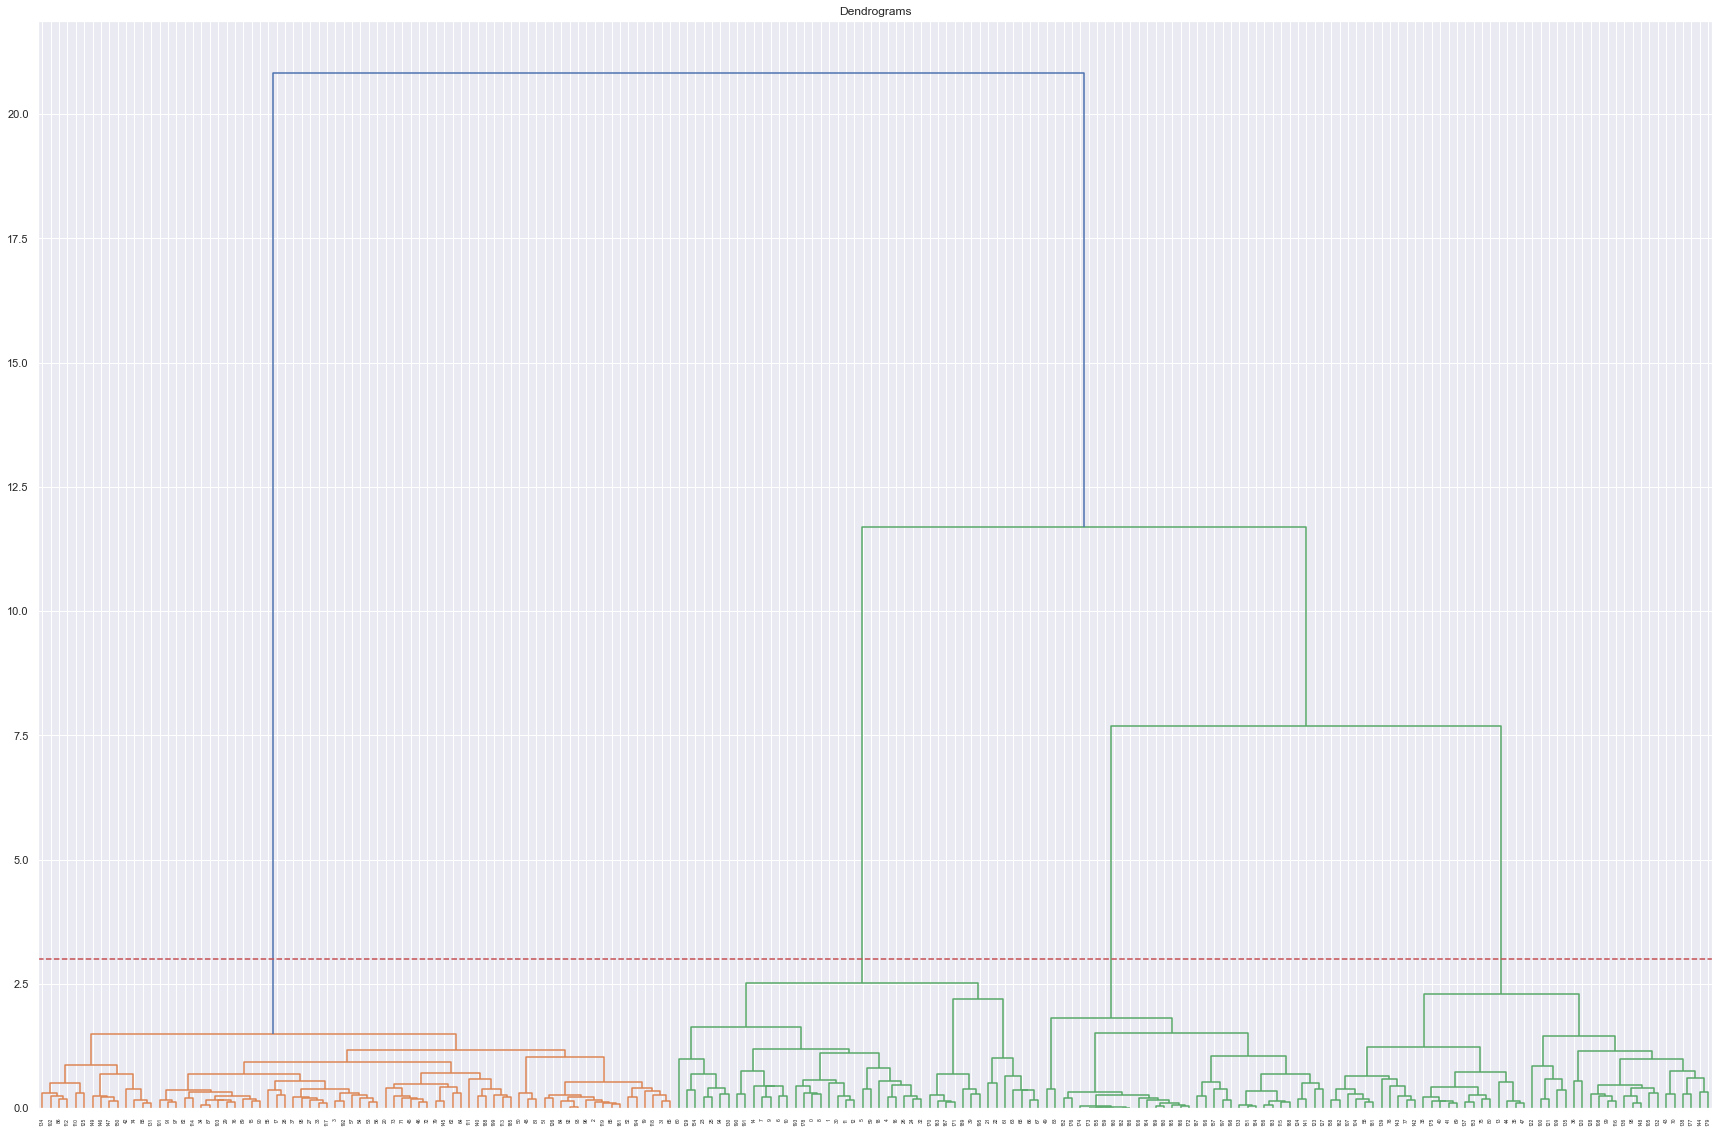

In [1537]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled_agg200, method='ward'))
plt.axhline(y= 3, color='r', linestyle='--')

In [1514]:
#create the model that we want, setting the linkage to ward, the distance threshold to 6 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
from sklearn.cluster import AgglomerativeClustering
model_a = AgglomerativeClustering(linkage="ward",distance_threshold = 3, n_clusters= None)
#fit the model to the data
model_a.fit(data_scaled_agg200)

AgglomerativeClustering(distance_threshold=3, n_clusters=None)

In [1650]:
#assign the labels back to the dataset
data_scaled_agg["clusters_a"] = model_a.labels_
data_scaled_agg

,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,video_players_taps,...,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps,Median_Distances,clusters_a
0,0.004870,0.029681,0.071725,0.0,0.077654,0.720859,0.333979,0.538538,0.006298,0.035875,...,0.016790,0.037477,0.246416,0.003673,0.003951,0.011182,0.001513,0.025535,2.481921e-07,0
1,0.004948,0.019521,0.048667,0.0,0.057212,0.774121,0.029923,0.446099,0.034336,0.046190,...,0.013582,0.020658,0.429448,0.044040,0.016847,0.007143,0.008477,0.002207,2.898864e-06,0
2,0.015668,0.069392,0.062882,0.0,0.058012,0.963606,0.035940,0.230937,0.019002,0.016091,...,0.033876,0.016673,0.007093,0.011539,0.027947,0.002382,0.002223,0.000000,6.529019e-05,3
3,0.023892,0.028717,0.187852,0.0,0.047072,0.957940,0.189438,0.052678,0.007673,0.016380,...,0.011165,0.033564,0.045028,0.008868,0.001218,0.000414,0.001424,0.007443,4.953038e-05,3
4,0.018381,0.036097,0.220498,0.0,0.097161,0.935177,0.030583,0.199309,0.005633,0.137939,...,0.007250,0.047517,0.036523,0.006178,0.001872,0.006314,0.000153,0.010994,5.370344e-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.010536,0.009324,0.025920,0.0,0.000373,0.539238,0.124425,0.829906,0.000000,0.011235,...,0.000140,0.001072,0.003776,0.000047,0.000420,0.002984,0.000000,0.000000,6.283330e-02,0
196,0.006268,0.000000,0.000000,0.0,0.000000,0.073965,0.008149,0.460088,0.000000,0.247595,...,0.000000,0.002507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.493681e-01,2
197,0.000000,0.009815,0.008507,0.0,0.000000,0.244079,0.205471,0.316713,0.000000,0.029446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.926724e-01,2
198,0.005080,0.000000,0.000000,0.0,0.008255,0.312411,0.080008,0.353684,0.006350,0.086357,...,0.000000,0.003175,0.000000,0.000000,0.037464,0.000000,0.000000,0.000000,8.728690e-01,2


In [1651]:
#extract the columns that we don't want to plot
not_plot_a = ['Median_Distances','clusters_a']
#use this to extract the columns that we do want to plot
to_plot_a = [col for col in data_scaled_agg.columns if col not in not_plot_a]
#extract the values that we want to plot
data_scaled_agg200= data_scaled_agg[to_plot_a]


In [1767]:
#extract the table showing the summary results
agglom_means_a =data_scaled_agg.groupby("clusters_a")[to_plot_a].mean()
agglom_means_T_a = agglom_means_a.T.round(3)

#turn this into a dataframe
agglom_means_T_a = pd.DataFrame(agglom_means_T_a)
#show the results
agglom_means_T_a

clusters_a,0,1,2,3
maps_taps,0.054,0.020,0.006,0.044
travel_taps,0.168,0.066,0.042,0.103
productivity_taps,0.209,0.032,0.008,0.052
personalisation_taps,0.000,0.000,0.000,0.000
tools_taps,0.039,0.011,0.009,0.035
communication_taps,0.641,0.448,0.189,0.909
news_magazines_taps,0.121,0.007,0.009,0.045
social_taps,0.415,0.073,0.082,0.089
shopping_taps,0.008,0.011,0.001,0.003
video_players_taps,0.044,0.028,0.025,0.027


/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/195666523.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_a["index"], rotation = 90,fontsize=40)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/195666523.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_a["index"], rotation = 90,fontsize=40)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/195666523.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_a["index"], rotation = 90,fontsize=40)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/195666523.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_a["index"], rotation = 90,fontsize=40)


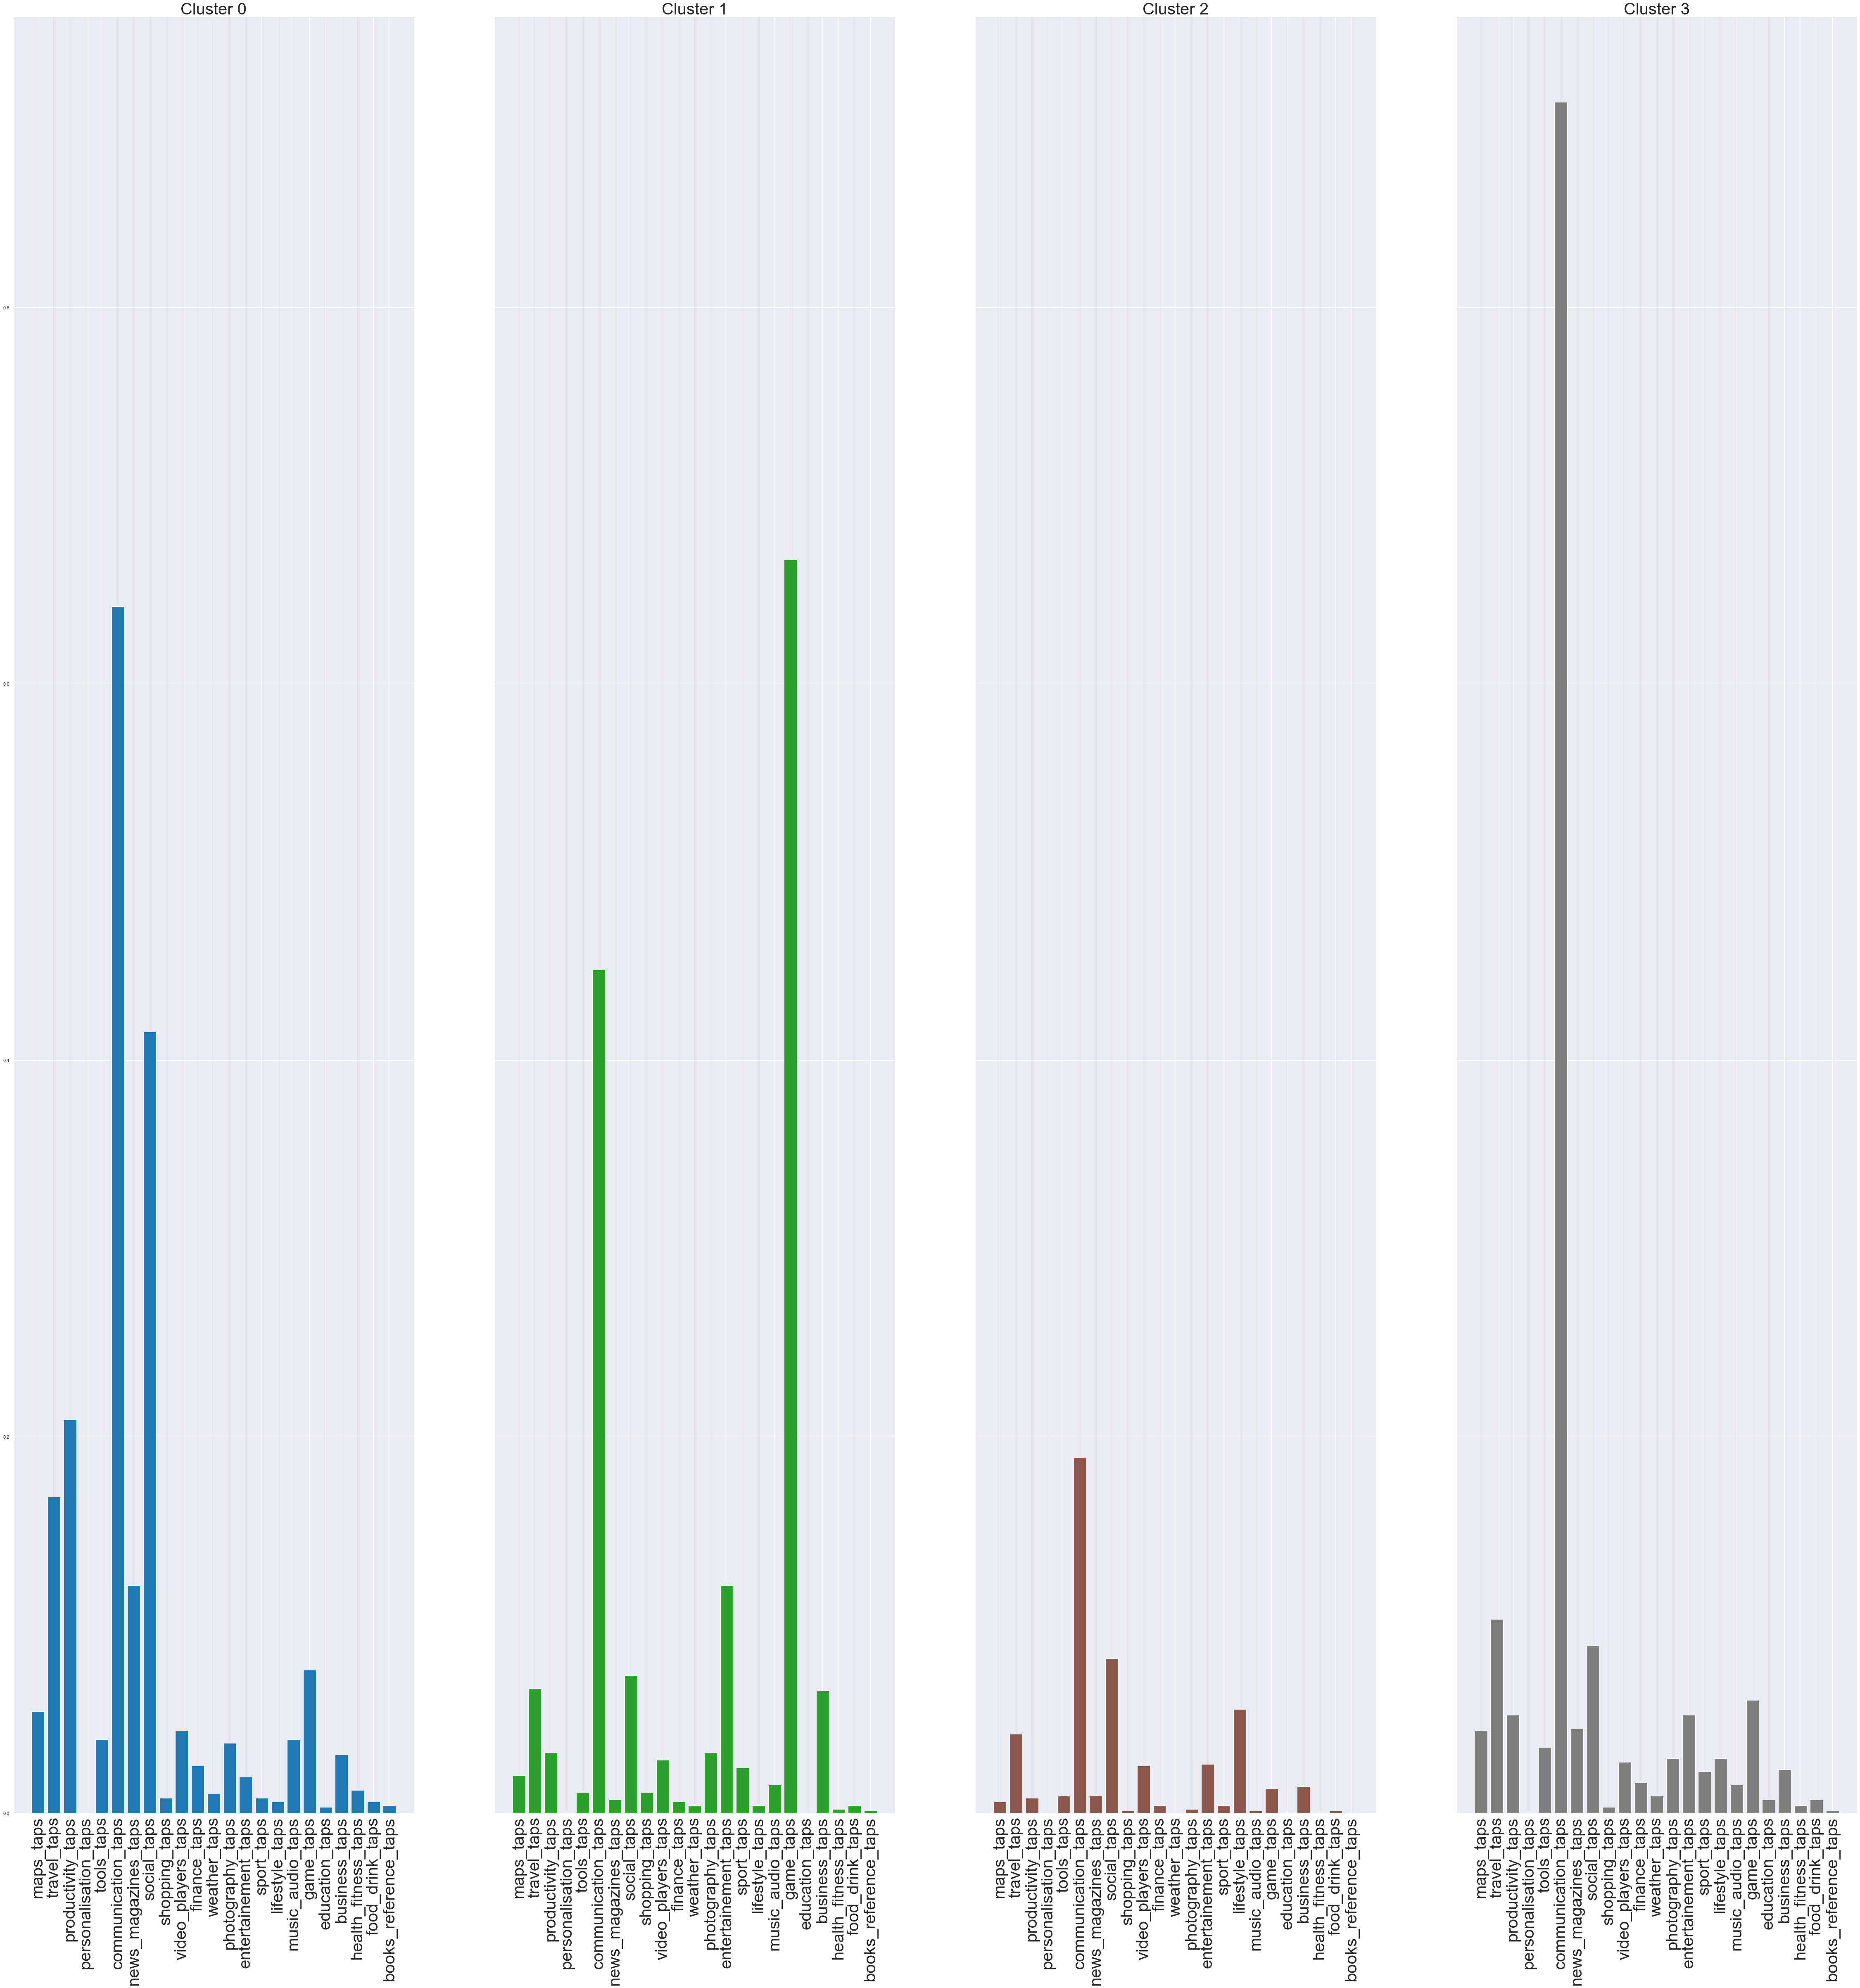

In [1768]:
#reset the index
agglom_means_T_a.reset_index(inplace=True)

#get the colours
colors = ["#1f77b4", "#2ca02c", "#8c564b", "#7f7f7f"]

#create subplots for each cluster
fig, ax = plt.subplots(1,4, figsize = (80,80), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T_a.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T_a[col], x=agglom_means_T_a["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T_a["index"], rotation = 90,fontsize=40)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 40)

2. Map Taps only

In [1634]:
# Drop the clusters
data_scaled_agg.drop(columns={'clusters_a'}, inplace= True)
data_scaled_agg

,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,video_players_taps,...,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps,Median_Distances
0,0.004870,0.029681,0.071725,0.0,0.077654,0.720859,0.333979,0.538538,0.006298,0.035875,...,0.005819,0.016790,0.037477,0.246416,0.003673,0.003951,0.011182,0.001513,0.025535,2.481921e-07
1,0.004948,0.019521,0.048667,0.0,0.057212,0.774121,0.029923,0.446099,0.034336,0.046190,...,0.018215,0.013582,0.020658,0.429448,0.044040,0.016847,0.007143,0.008477,0.002207,2.898864e-06
2,0.015668,0.069392,0.062882,0.0,0.058012,0.963606,0.035940,0.230937,0.019002,0.016091,...,0.003335,0.033876,0.016673,0.007093,0.011539,0.027947,0.002382,0.002223,0.000000,6.529019e-05
3,0.023892,0.028717,0.187852,0.0,0.047072,0.957940,0.189438,0.052678,0.007673,0.016380,...,0.000000,0.011165,0.033564,0.045028,0.008868,0.001218,0.000414,0.001424,0.007443,4.953038e-05
4,0.018381,0.036097,0.220498,0.0,0.097161,0.935177,0.030583,0.199309,0.005633,0.137939,...,0.001770,0.007250,0.047517,0.036523,0.006178,0.001872,0.006314,0.000153,0.010994,5.370344e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.010536,0.009324,0.025920,0.0,0.000373,0.539238,0.124425,0.829906,0.000000,0.011235,...,0.000000,0.000140,0.001072,0.003776,0.000047,0.000420,0.002984,0.000000,0.000000,6.283330e-02
196,0.006268,0.000000,0.000000,0.0,0.000000,0.073965,0.008149,0.460088,0.000000,0.247595,...,0.000000,0.000000,0.002507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.493681e-01
197,0.000000,0.009815,0.008507,0.0,0.000000,0.244079,0.205471,0.316713,0.000000,0.029446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.926724e-01
198,0.005080,0.000000,0.000000,0.0,0.008255,0.312411,0.080008,0.353684,0.006350,0.086357,...,0.000000,0.000000,0.003175,0.000000,0.000000,0.037464,0.000000,0.000000,0.000000,8.728690e-01


In [1551]:
data_scaled_agg

,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,video_players_taps,...,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps,Median_Distances
0,0.004870,0.029681,0.071725,0.0,0.077654,0.720859,0.333979,0.538538,0.006298,0.035875,...,0.005819,0.016790,0.037477,0.246416,0.003673,0.003951,0.011182,0.001513,0.025535,2.481921e-07
1,0.004948,0.019521,0.048667,0.0,0.057212,0.774121,0.029923,0.446099,0.034336,0.046190,...,0.018215,0.013582,0.020658,0.429448,0.044040,0.016847,0.007143,0.008477,0.002207,2.898864e-06
2,0.015668,0.069392,0.062882,0.0,0.058012,0.963606,0.035940,0.230937,0.019002,0.016091,...,0.003335,0.033876,0.016673,0.007093,0.011539,0.027947,0.002382,0.002223,0.000000,6.529019e-05
3,0.023892,0.028717,0.187852,0.0,0.047072,0.957940,0.189438,0.052678,0.007673,0.016380,...,0.000000,0.011165,0.033564,0.045028,0.008868,0.001218,0.000414,0.001424,0.007443,4.953038e-05
4,0.018381,0.036097,0.220498,0.0,0.097161,0.935177,0.030583,0.199309,0.005633,0.137939,...,0.001770,0.007250,0.047517,0.036523,0.006178,0.001872,0.006314,0.000153,0.010994,5.370344e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.010536,0.009324,0.025920,0.0,0.000373,0.539238,0.124425,0.829906,0.000000,0.011235,...,0.000000,0.000140,0.001072,0.003776,0.000047,0.000420,0.002984,0.000000,0.000000,6.283330e-02
196,0.006268,0.000000,0.000000,0.0,0.000000,0.073965,0.008149,0.460088,0.000000,0.247595,...,0.000000,0.000000,0.002507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.493681e-01
197,0.000000,0.009815,0.008507,0.0,0.000000,0.244079,0.205471,0.316713,0.000000,0.029446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.926724e-01
198,0.005080,0.000000,0.000000,0.0,0.008255,0.312411,0.080008,0.353684,0.006350,0.086357,...,0.000000,0.000000,0.003175,0.000000,0.000000,0.037464,0.000000,0.000000,0.000000,8.728690e-01


In [1552]:
# select only maps category
data_scaled_agg_map = data_scaled_agg[['maps_taps']]
data_scaled_agg_map

,maps_taps
0,0.004870
1,0.004948
2,0.015668
3,0.023892
4,0.018381
...,...
195,0.010536
196,0.006268
197,0.000000
198,0.005080


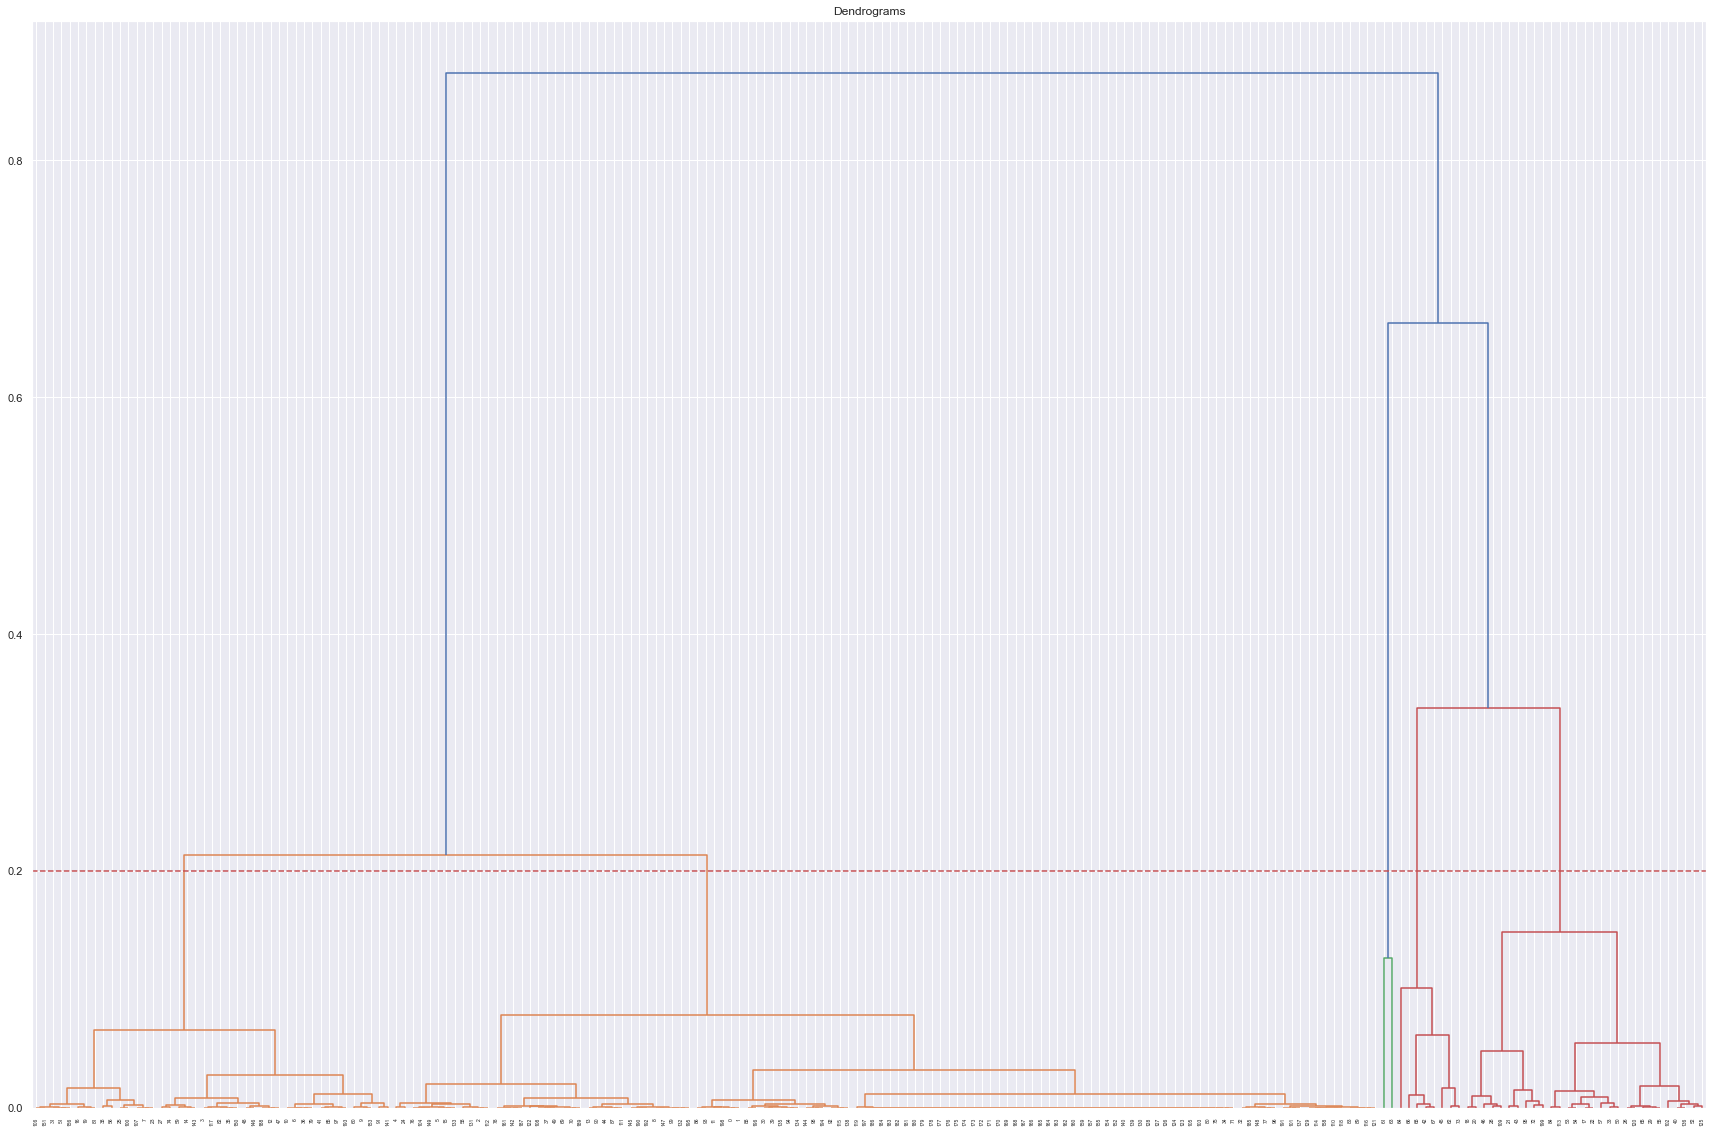

In [1554]:
# Maps Taps
#import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled_agg_map, method='ward'))
plt.axhline(y= 0.20, color='r', linestyle='--')   

In [1555]:

#create the model that we want, setting the linkage to ward, the distance threshold to 6 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
from sklearn.cluster import AgglomerativeClustering
model_maps_200 = AgglomerativeClustering(linkage="ward", 
                                 distance_threshold = 0.20, 
                                 n_clusters=None)
#fit the model to the data
model_maps_200.fit(data_scaled_agg_map)

AgglomerativeClustering(distance_threshold=0.2, n_clusters=None)

In [1556]:
model_maps_200.labels_

array([3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 0, 0, 4, 0, 0,
       0, 4, 3, 4, 0, 4, 0, 0, 3, 4, 3, 0, 3, 4, 4, 3, 4, 3, 0, 4, 1, 0,
       3, 1, 0, 4, 4, 3, 0, 4, 0, 0, 0, 0, 4, 0, 3, 4, 4, 2, 1, 2, 1, 0,
       1, 1, 1, 3, 3, 3, 0, 1, 4, 3, 3, 3, 3, 4, 3, 4, 4, 3, 0, 4, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 0, 3, 4, 3, 3, 4, 3, 0, 3, 3, 3, 4, 4, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 4, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 4,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 0])

In [1557]:
#assign the labels back to the dataset
data_scaled_agg_map["model_maps"] = model_maps_200.labels_
data_scaled_agg_map

/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/742376101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled_agg_map["model_maps"] = model_maps_200.labels_


,maps_taps,model_maps
0,0.004870,3
1,0.004948,3
2,0.015668,3
3,0.023892,4
4,0.018381,3
...,...,...
195,0.010536,3
196,0.006268,3
197,0.000000,3
198,0.005080,3


In [1545]:
data_scaled_agg_map

,maps_taps
0,0.004870
1,0.004948
2,0.015668
3,0.023892
4,0.018381
...,...
195,0.010536
196,0.006268
197,0.000000
198,0.005080


3. Travel taps only

In [1528]:
# select only travel category
data_scaled_agg_travel = data_scaled_agg[['travel_taps']]
data_scaled_agg_travel

,travel_taps
0,0.029681
1,0.019521
2,0.069392
3,0.028717
4,0.036097
...,...
195,0.009324
196,0.000000
197,0.009815
198,0.000000


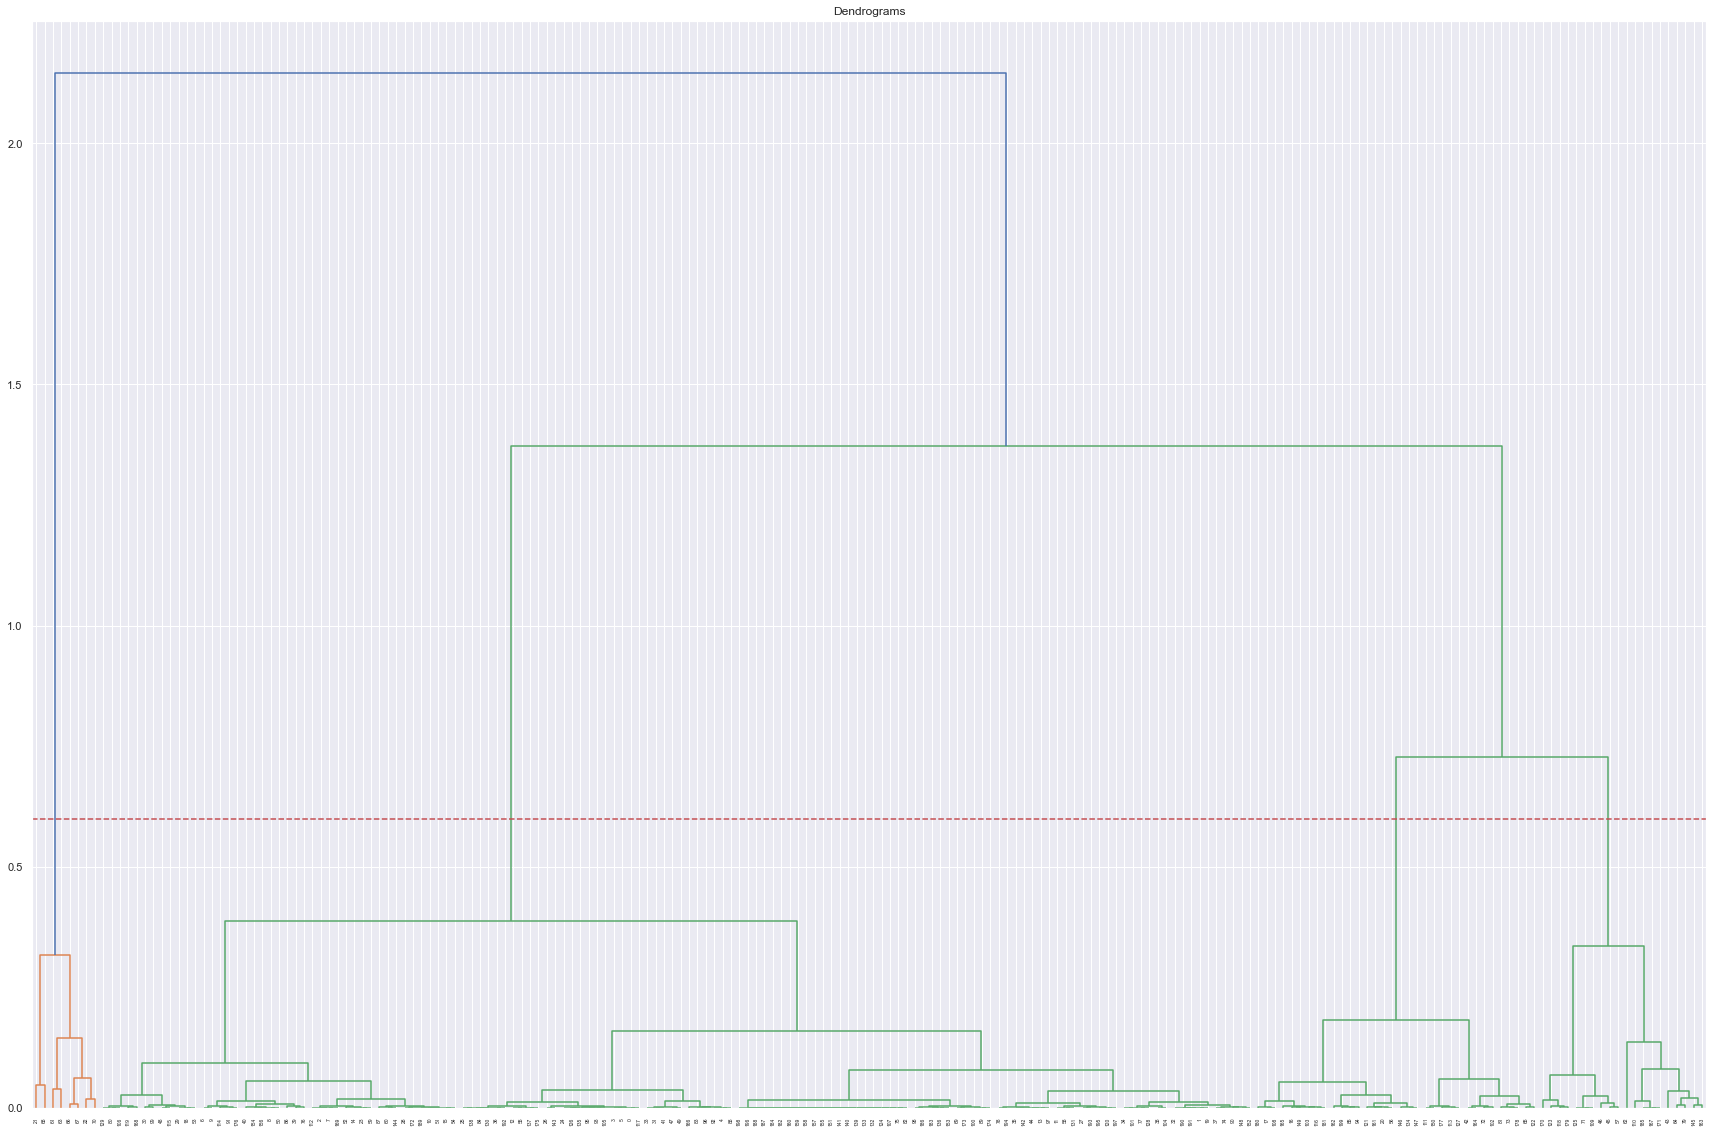

In [1539]:
# Maps Taps
#import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled_agg_travel, method='ward'))
plt.axhline(y= 0.60, color='r', linestyle='--')   

In [1543]:

#create the model that we want, setting the linkage to ward, the distance threshold to 6 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
from sklearn.cluster import AgglomerativeClustering
model_travel_200 = AgglomerativeClustering(linkage="ward", 
                                 distance_threshold = 0.6, 
                                 n_clusters=None)
#fit the model to the data
model_travel_200.fit(data_scaled_agg_travel)

AgglomerativeClustering(distance_threshold=0.6, n_clusters=None)

In [1559]:
model_travel_200.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 2, 1, 2, 3,
       1, 1, 1, 0, 1, 2, 3, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 2,
       2, 3, 0, 3, 0, 0, 3, 0, 2, 0, 0, 3, 3, 2, 0, 2, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 3, 3, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 3, 3, 2, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3])

In [1558]:
#assign the labels back to the dataset
data_scaled_agg_travel["model_travel"] = model_travel_200.labels_
data_scaled_agg_travel

/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/1653128930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled_agg_travel["model_travel"] = model_travel_200.labels_


,travel_taps,model_travel
0,0.029681,0
1,0.019521,0
2,0.069392,0
3,0.028717,0
4,0.036097,0
...,...,...
195,0.009324,0
196,0.000000,0
197,0.009815,0
198,0.000000,0


4. Travel Taps and Map Taps combined

In [1529]:
# select only maps and travel category
data_scaled_agg_travel_maps = data_scaled_agg[['maps_taps','travel_taps']]
data_scaled_agg_travel_maps

,maps_taps,travel_taps
0,0.004870,0.029681
1,0.004948,0.019521
2,0.015668,0.069392
3,0.023892,0.028717
4,0.018381,0.036097
...,...,...
195,0.010536,0.009324
196,0.006268,0.000000
197,0.000000,0.009815
198,0.005080,0.000000


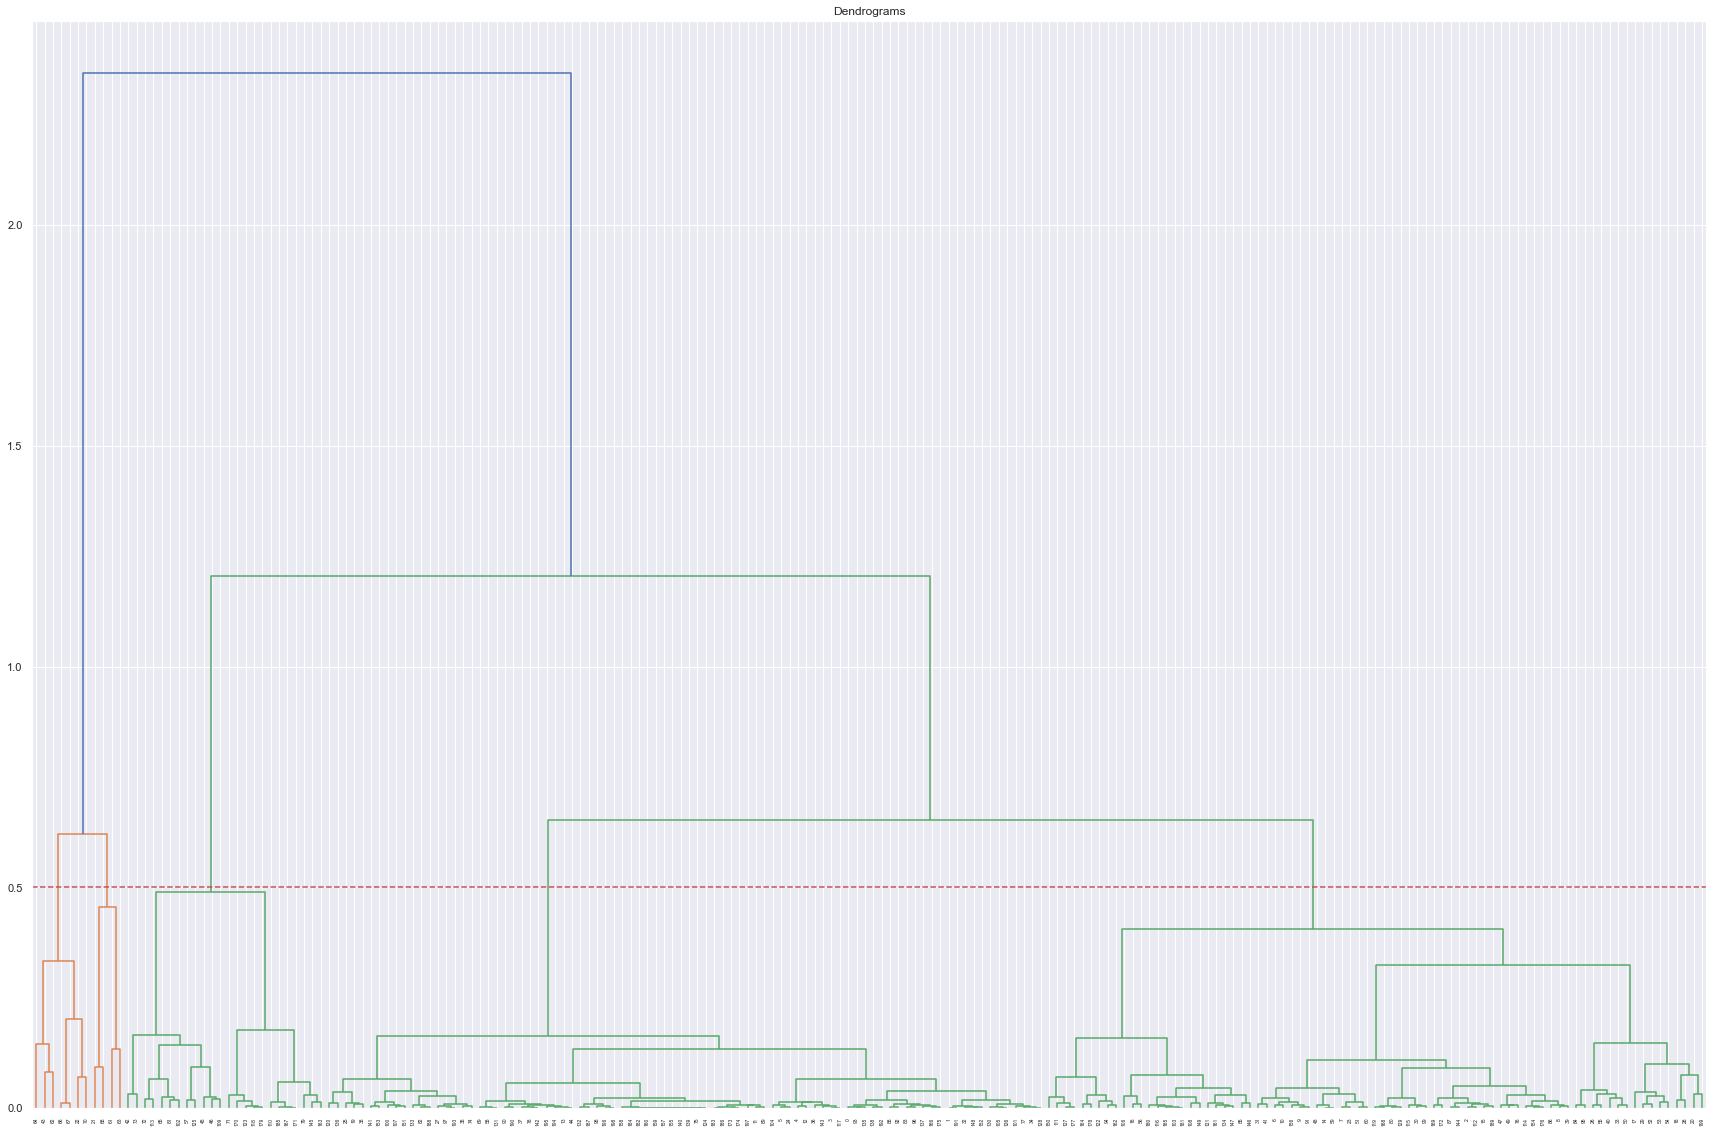

In [1541]:
# Travel Taps and Map Taps
plt.figure(figsize=(30, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled_agg_travel_maps, method='ward'))
plt.axhline(y= 0.5, color='r', linestyle='--')  

In [1544]:

#create the model that we want, setting the linkage to ward, the distance threshold to 6 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
from sklearn.cluster import AgglomerativeClustering
model_maps_travel = AgglomerativeClustering(linkage="ward", 
                                 distance_threshold = 0.5, 
                                 n_clusters=None)
#fit the model to the data
model_maps_travel.fit(data_scaled_agg_travel_maps)

AgglomerativeClustering(distance_threshold=0.5, n_clusters=None)

In [1561]:
#assign the labels back to the dataset
data_scaled_agg_travel_maps["model_maps_travel"] = model_maps_travel.labels_
data_scaled_agg_travel_maps

/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/3203835305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled_agg_travel_maps["model_maps_travel"] = model_maps_travel.labels_


,maps_taps,travel_taps,model_maps_travel
0,0.004870,0.029681,3
1,0.004948,0.019521,3
2,0.015668,0.069392,1
3,0.023892,0.028717,3
4,0.018381,0.036097,3
...,...,...,...
195,0.010536,0.009324,3
196,0.006268,0.000000,3
197,0.000000,0.009815,3
198,0.005080,0.000000,3


In [ ]:
# APPPEND MEDIAN DSTANCES TO THE CLUSTERED DATA

In [1567]:
data_scaled_agg_travel_maps['Median_Distances'] = data_scaled_agg['Median_Distances']
data_scaled_agg_travel['Median_Distances'] = data_scaled_agg['Median_Distances']
data_scaled_agg_map['Median_Distances'] = data_scaled_agg['Median_Distances']

/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2428042556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled_agg_travel_maps['Median_Distances'] = data_scaled_agg['Median_Distances']
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2428042556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled_agg_travel['Median_Distances'] = data_scaled_agg['Median_Distances']
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2428042556.py:3: Setting

In [ ]:
#VISUALISE TJE DATA

In [1570]:
data_scaled_agg_map

,maps_taps,model_maps,Median_Distances
0,0.004870,3,2.481921e-07
1,0.004948,3,2.898864e-06
2,0.015668,3,6.529019e-05
3,0.023892,4,4.953038e-05
4,0.018381,3,5.370344e-05
...,...,...,...
195,0.010536,3,6.283330e-02
196,0.006268,3,8.493681e-01
197,0.000000,3,8.926724e-01
198,0.005080,3,8.728690e-01


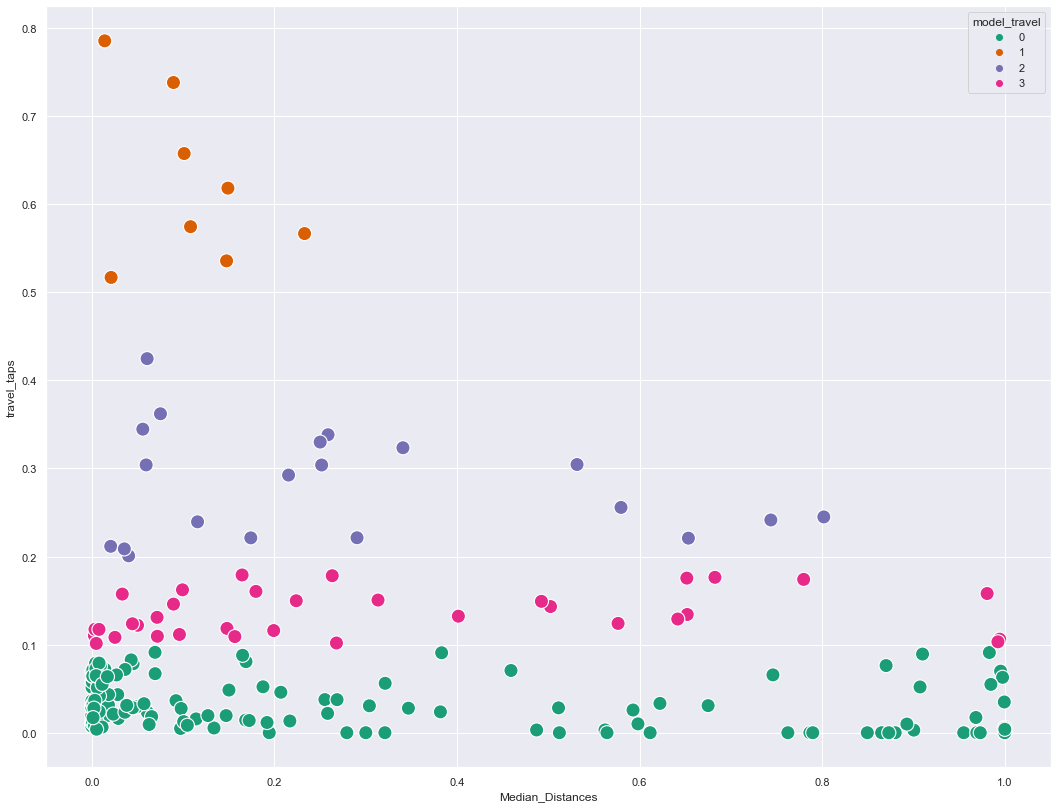

In [1641]:
sns.scatterplot(
    x='Median_Distances',
    y='travel_taps', 
    data=data_scaled_agg_travel,
    s=200,
    palette='Dark2',
    hue='model_travel');

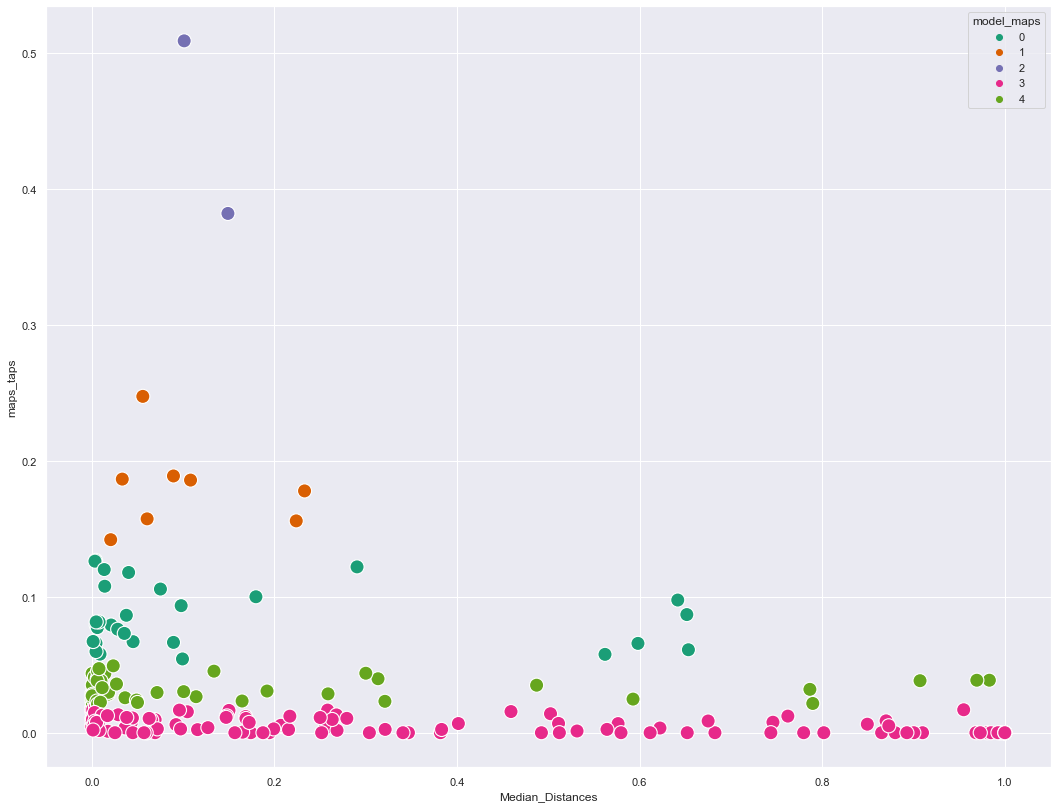

In [1640]:
sns.scatterplot(
    x='Median_Distances',
    y='maps_taps', 
    data=data_scaled_agg_map,
    s=200,
    palette='Dark2',
    hue='model_maps');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


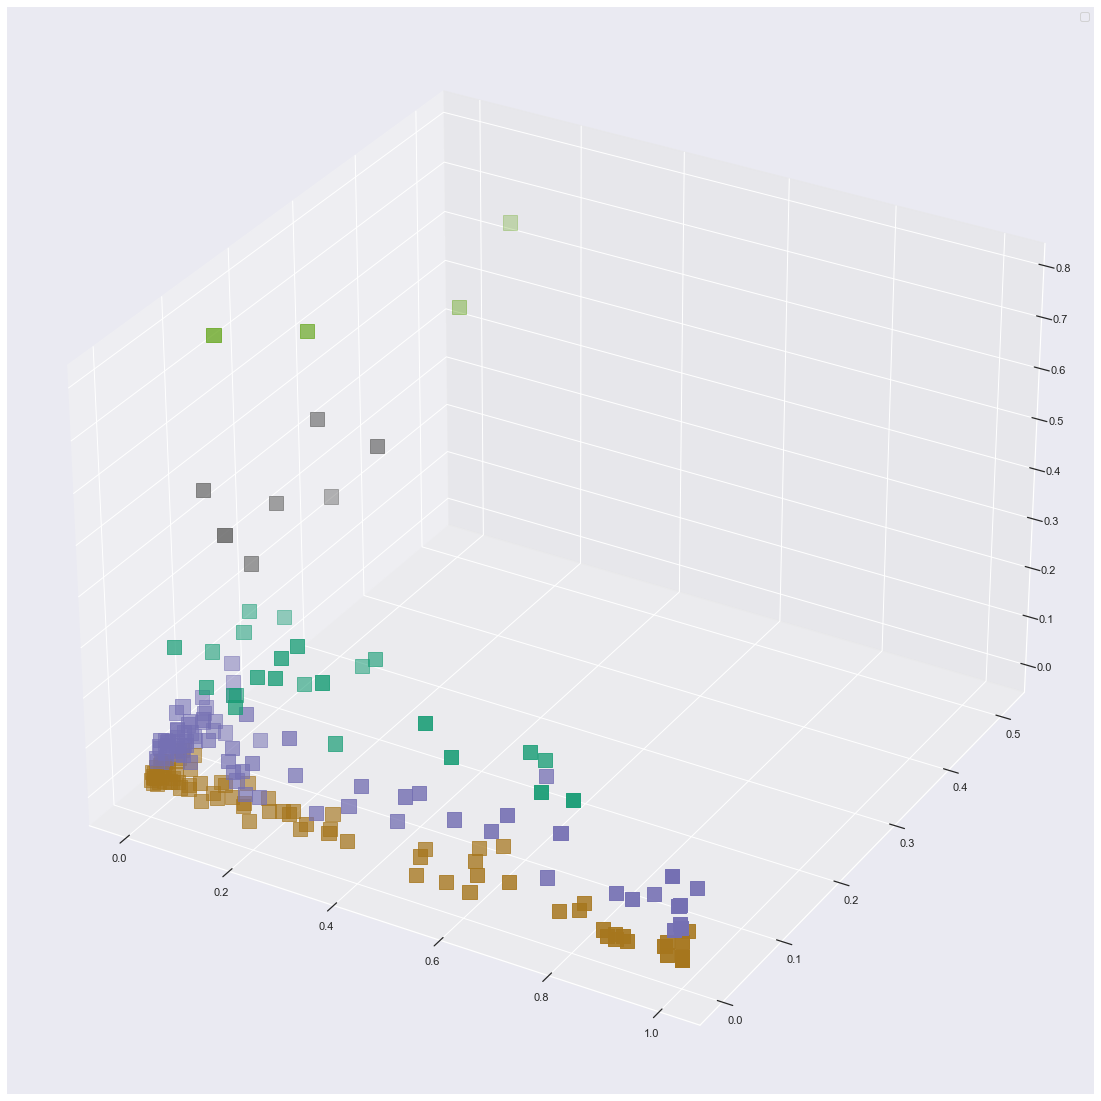

In [1670]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

 
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')
ax.legend()
x = np.array(data_scaled_agg_travel_maps['Median_Distances'])
y = np.array(data_scaled_agg_travel_maps['maps_taps'])
z = np.array(data_scaled_agg_travel_maps['travel_taps'])

ax.scatter(x,y,z, s=200, marker="s", c=data_scaled_agg_travel_maps["model_maps_travel"], cmap = 'Dark2')

plt.show()

In [1736]:
#extract the columns that we don't want to plot
not_plot_aggm = ['Median_Distances','model_maps']
#use this to extract the columns that we do want to plot
to_plot_aggm = [col for col in data_scaled_agg_map.columns if col not in not_plot_aggm]

In [1737]:
#extract the columns that we don't want to plot
not_plot_aggt = ['Median_Distances','model_travel']
#use this to extract the columns that we do want to plot
to_plot_aggt = [col for col in data_scaled_agg_travel.columns if col not in not_plot_aggt]
#extract the values that we want to plot


In [1738]:
#extract the columns that we don't want to plot
not_plot_aggmt = ['Median_Distances','model_maps_travel']
#use this to extract the columns that we do want to plot
to_plot_aggmt = [col for col in data_scaled_agg_travel_maps.columns if col not in not_plot_aggmt]


In [1760]:
#extract the table showing the summary results
agglom_means_aggm =data_scaled_agg_map.groupby("model_maps")[to_plot_aggm].mean()
agglom_means_T_aggm = agglom_means_aggm.T.round(3)

#turn this into a dataframe
agglom_means_T_aggm = pd.DataFrame(agglom_means_T_aggm)
#show the results
agglom_means_T_aggm

model_maps,0,1,2,3,4
maps_taps,0.085,0.18,0.446,0.005,0.032


In [1746]:
agglom_means_T_aggm

model_maps,0,1,2,3,4
maps_taps,0.085,0.18,0.446,0.005,0.032


In [1759]:
#extract the table showing the summary results
agglom_means_aggt =data_scaled_agg_travel.groupby("model_travel")[to_plot_aggt].mean()
agglom_means_T_aggt = agglom_means_aggt.T.round(3)

#turn this into a dataframe
agglom_means_T_aggt = pd.DataFrame(agglom_means_T_aggt)
#show the results
agglom_means_T_aggt

model_travel,0,1,2,3
travel_taps,0.033,0.624,0.28,0.135


In [1747]:
agglom_means_T_aggt

model_travel,0,1,2,3
travel_taps,0.033,0.624,0.28,0.135


In [1758]:
#extract the table showing the summary results
agglom_means_aggmt =data_scaled_agg_travel_maps.groupby("model_maps_travel")[to_plot_aggmt].mean()
agglom_means_T_aggmt = agglom_means_aggmt.T.round(3)

#turn this into a dataframe
agglom_means_T_aggmt = pd.DataFrame(agglom_means_T_aggmt)
#show the results
agglom_means_T_aggmt

model_maps_travel,0,1,2,3,4
maps_taps,0.052,0.029,0.297,0.013,0.138
travel_taps,0.232,0.085,0.700,0.015,0.475


In [1754]:
agglom_means_T_aggmt

model_maps_travel,0,1,2,3,4
maps_taps,0.052,0.029,0.297,0.013,0.138
travel_taps,0.232,0.085,0.700,0.015,0.475


AxesSubplot(0.125,0.125;0.133621x0.755)
AxesSubplot(0.285345,0.125;0.133621x0.755)
AxesSubplot(0.44569,0.125;0.133621x0.755)
AxesSubplot(0.606034,0.125;0.133621x0.755)
AxesSubplot(0.766379,0.125;0.133621x0.755)


/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/695908852.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggmt["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/695908852.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggmt["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/695908852.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggmt["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/695908852.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggmt["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/6959088

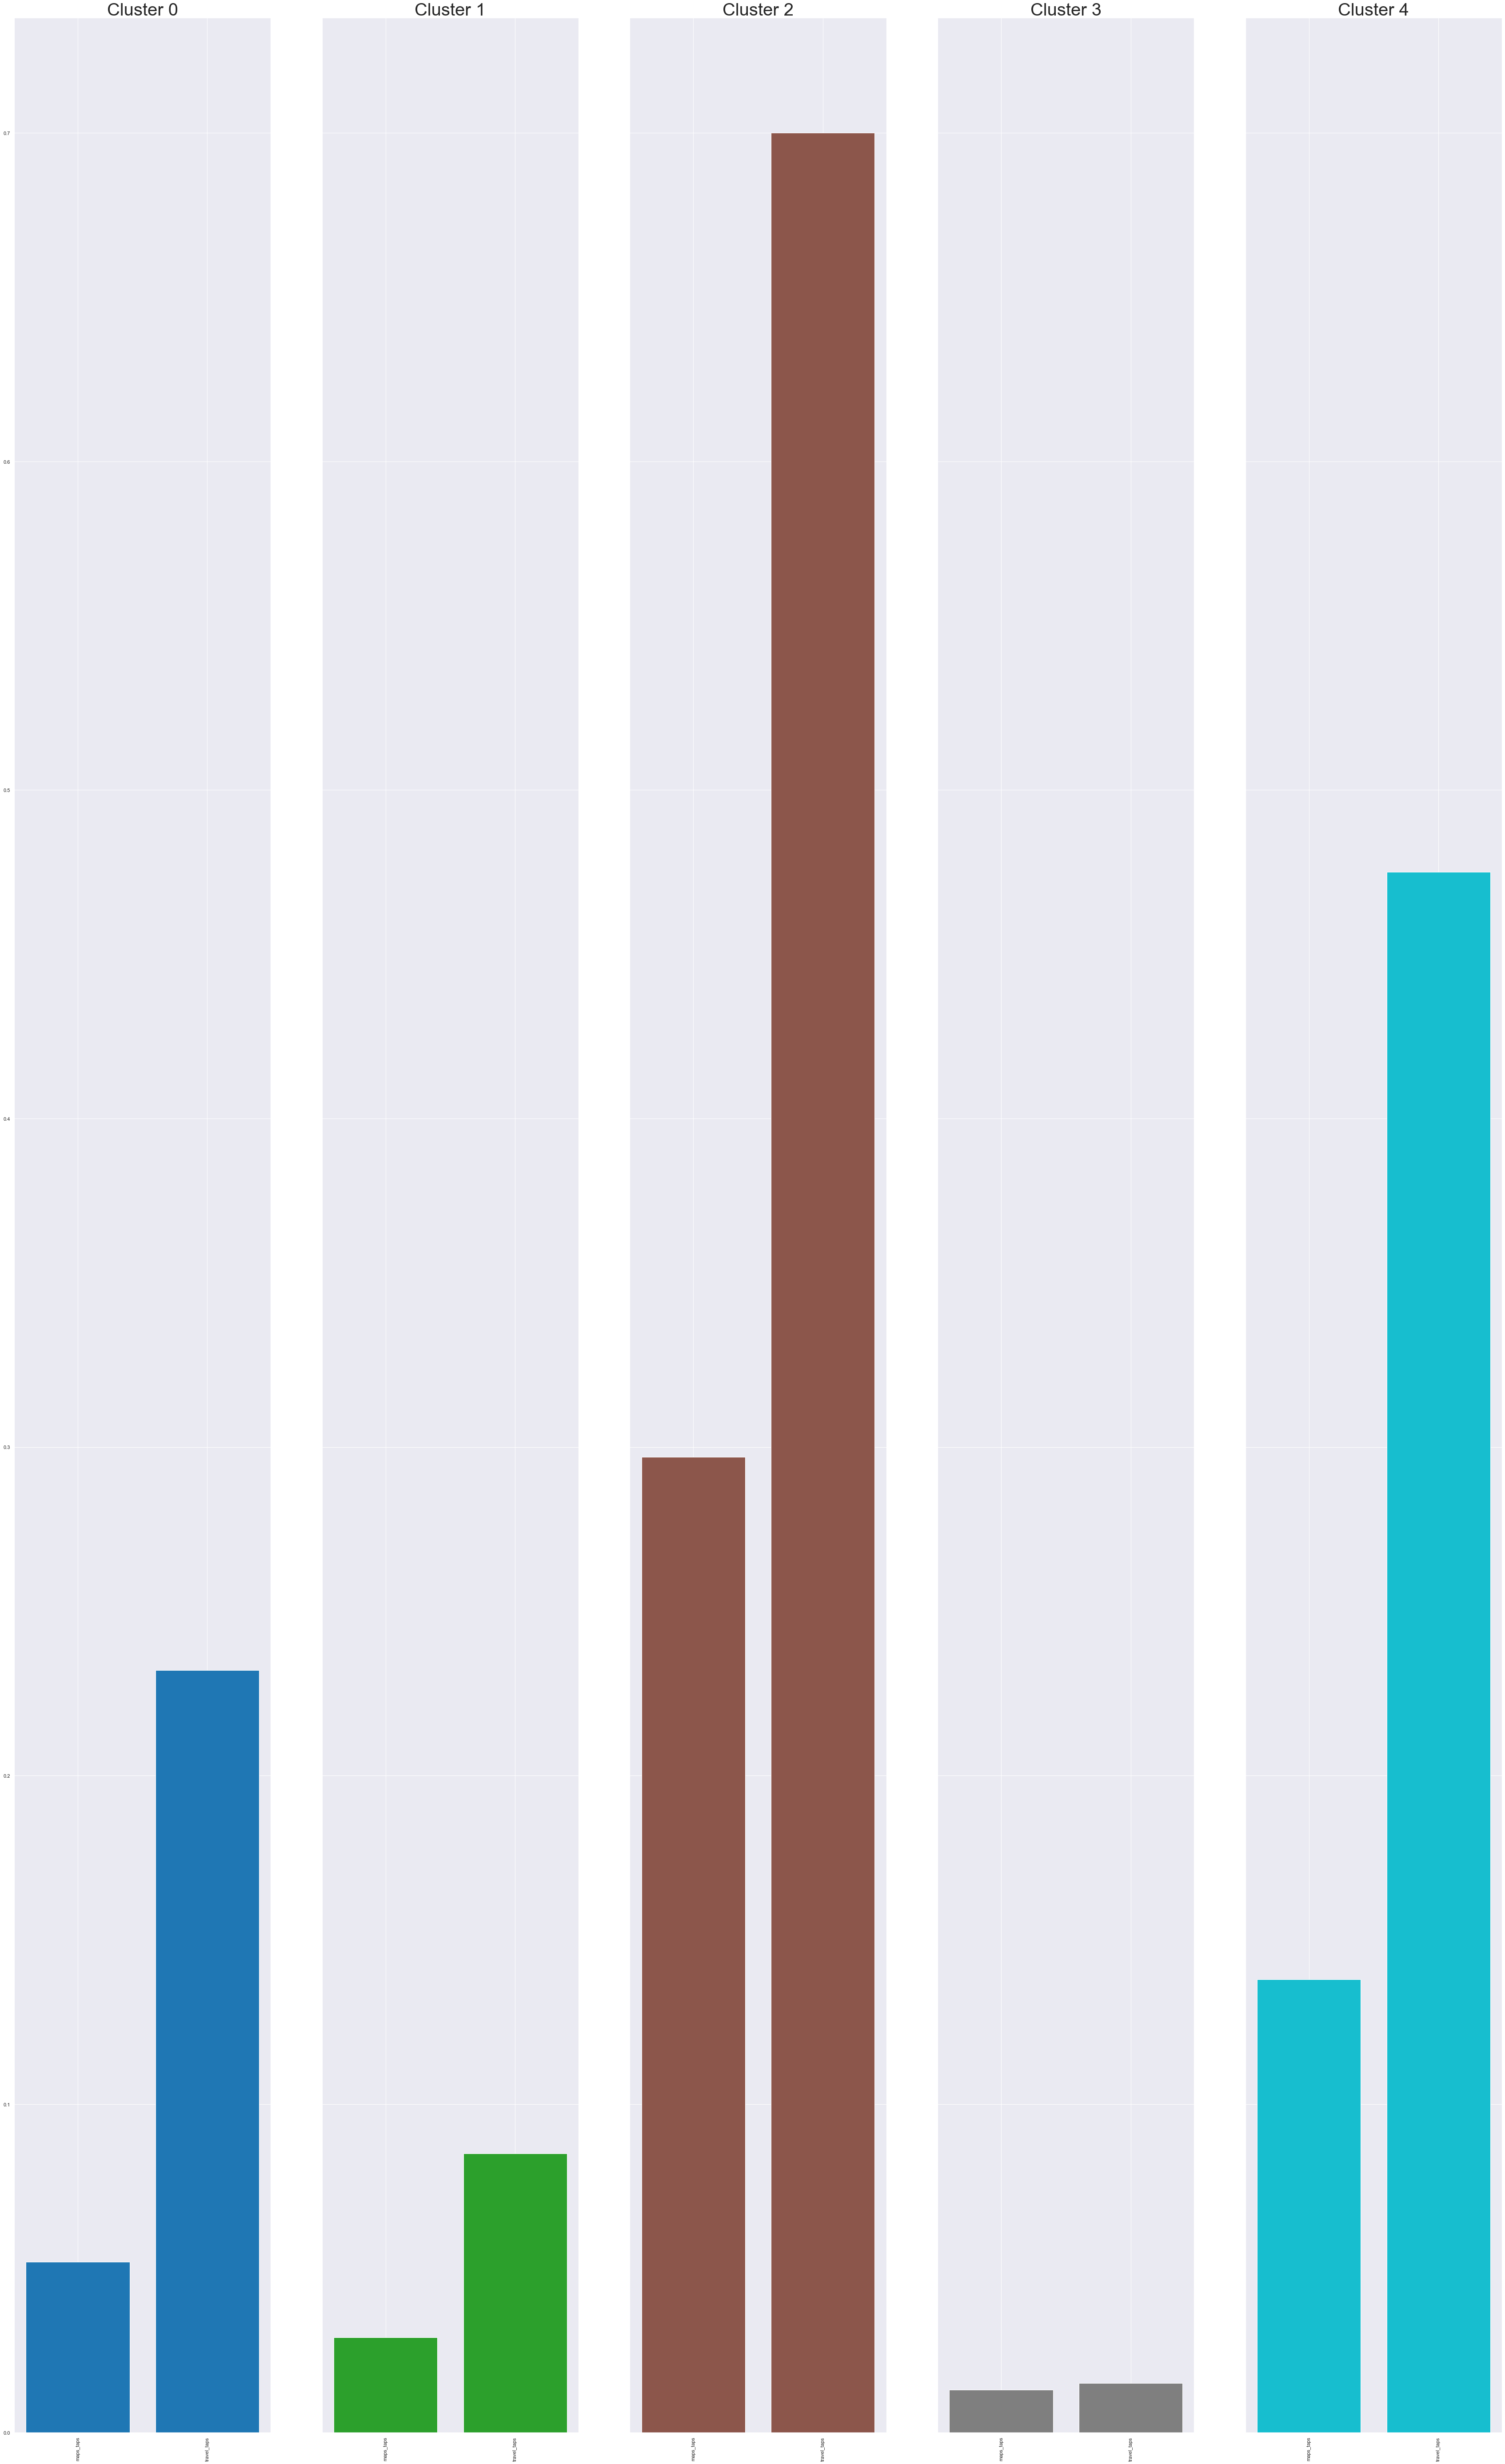

In [1755]:
#reset the index
agglom_means_T_aggmt.reset_index(inplace=True)

#get the colours
colors = ["#1f77b4", "#2ca02c", "#8c564b", "#7f7f7f", "#17becf"]

#create subplots for each cluster
fig, ax = plt.subplots(1,5, figsize = (60,100), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T_aggmt.columns):

    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        print(ax)
        ##plot the bar chart
        ax.bar(height = agglom_means_T_aggmt[col], x=agglom_means_T_aggmt["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T_aggmt["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 40)

/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2878009512.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggt["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2878009512.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggt["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2878009512.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggt["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/2878009512.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggt["index"], rotation = 90)


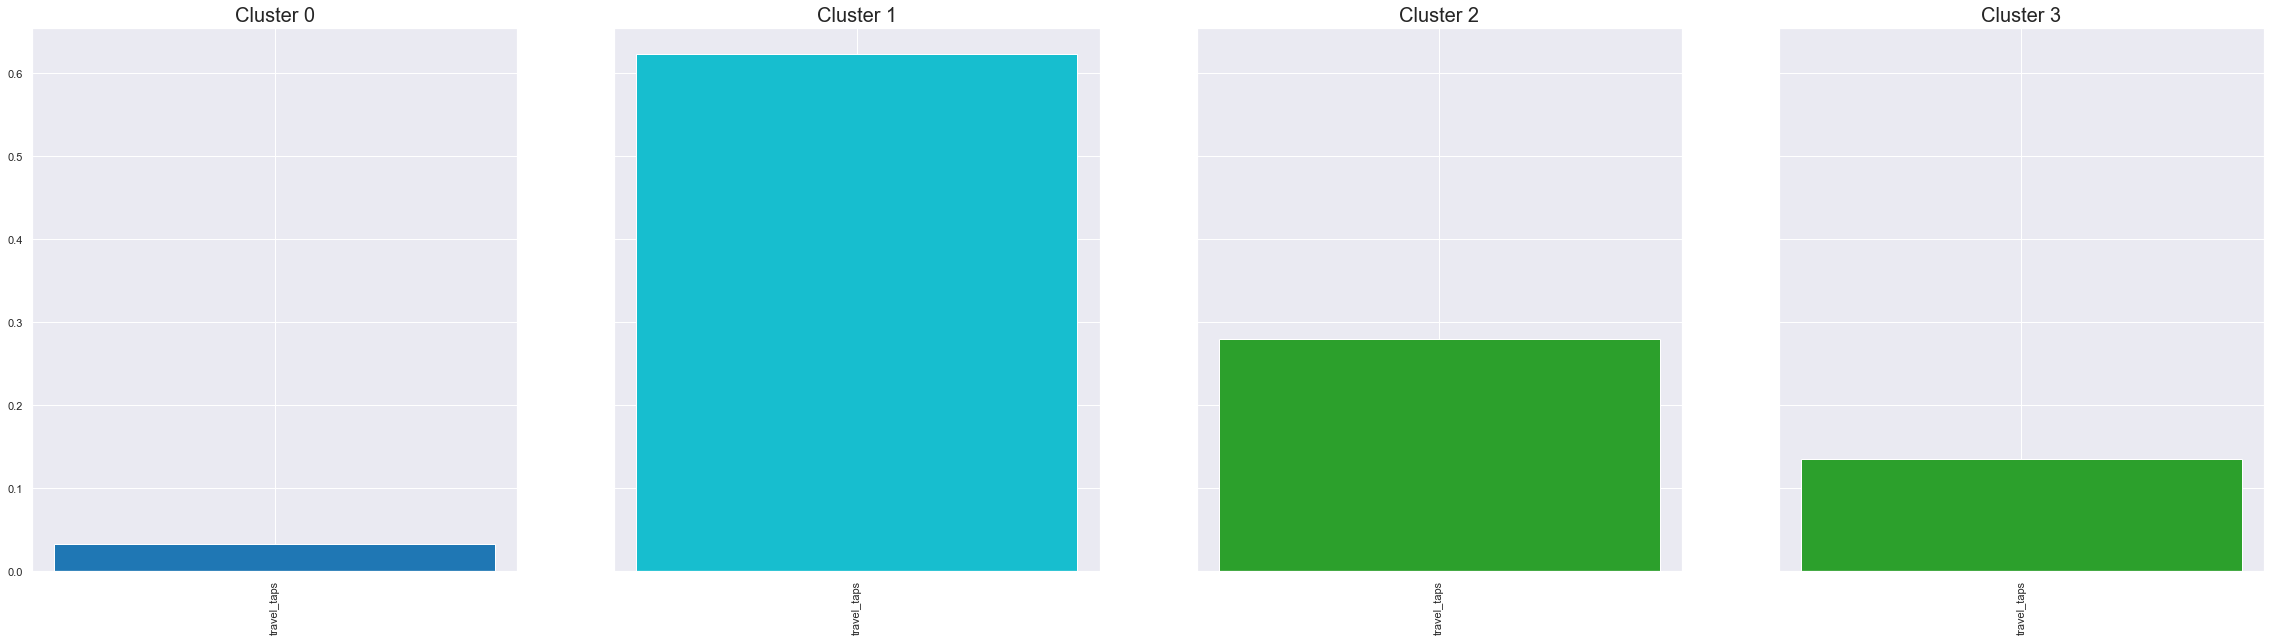

In [1756]:
#reset the index
agglom_means_T_aggt.reset_index(inplace=True)

#get the colours
colors = ["#1f77b4","#17becf","#2ca02c","#2ca02c"]

#create subplots for each cluster
fig, ax = plt.subplots(1,4, figsize = (40,10), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T_aggt.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T_aggt[col], x=agglom_means_T_aggt["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T_aggt["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 20)

0
AxesSubplot(0.125,0.125;0.133621x0.755)
1
AxesSubplot(0.285345,0.125;0.133621x0.755)
2
AxesSubplot(0.44569,0.125;0.133621x0.755)
3
AxesSubplot(0.606034,0.125;0.133621x0.755)
4
AxesSubplot(0.766379,0.125;0.133621x0.755)


/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/622391458.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggm["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/622391458.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggm["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/622391458.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggm["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/622391458.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T_aggm["index"], rotation = 90)
/var/folders/g9/kvjj1vsj5vldmynmr3nz9s8h0000gn/T/ipykernel_38906/622391458.p

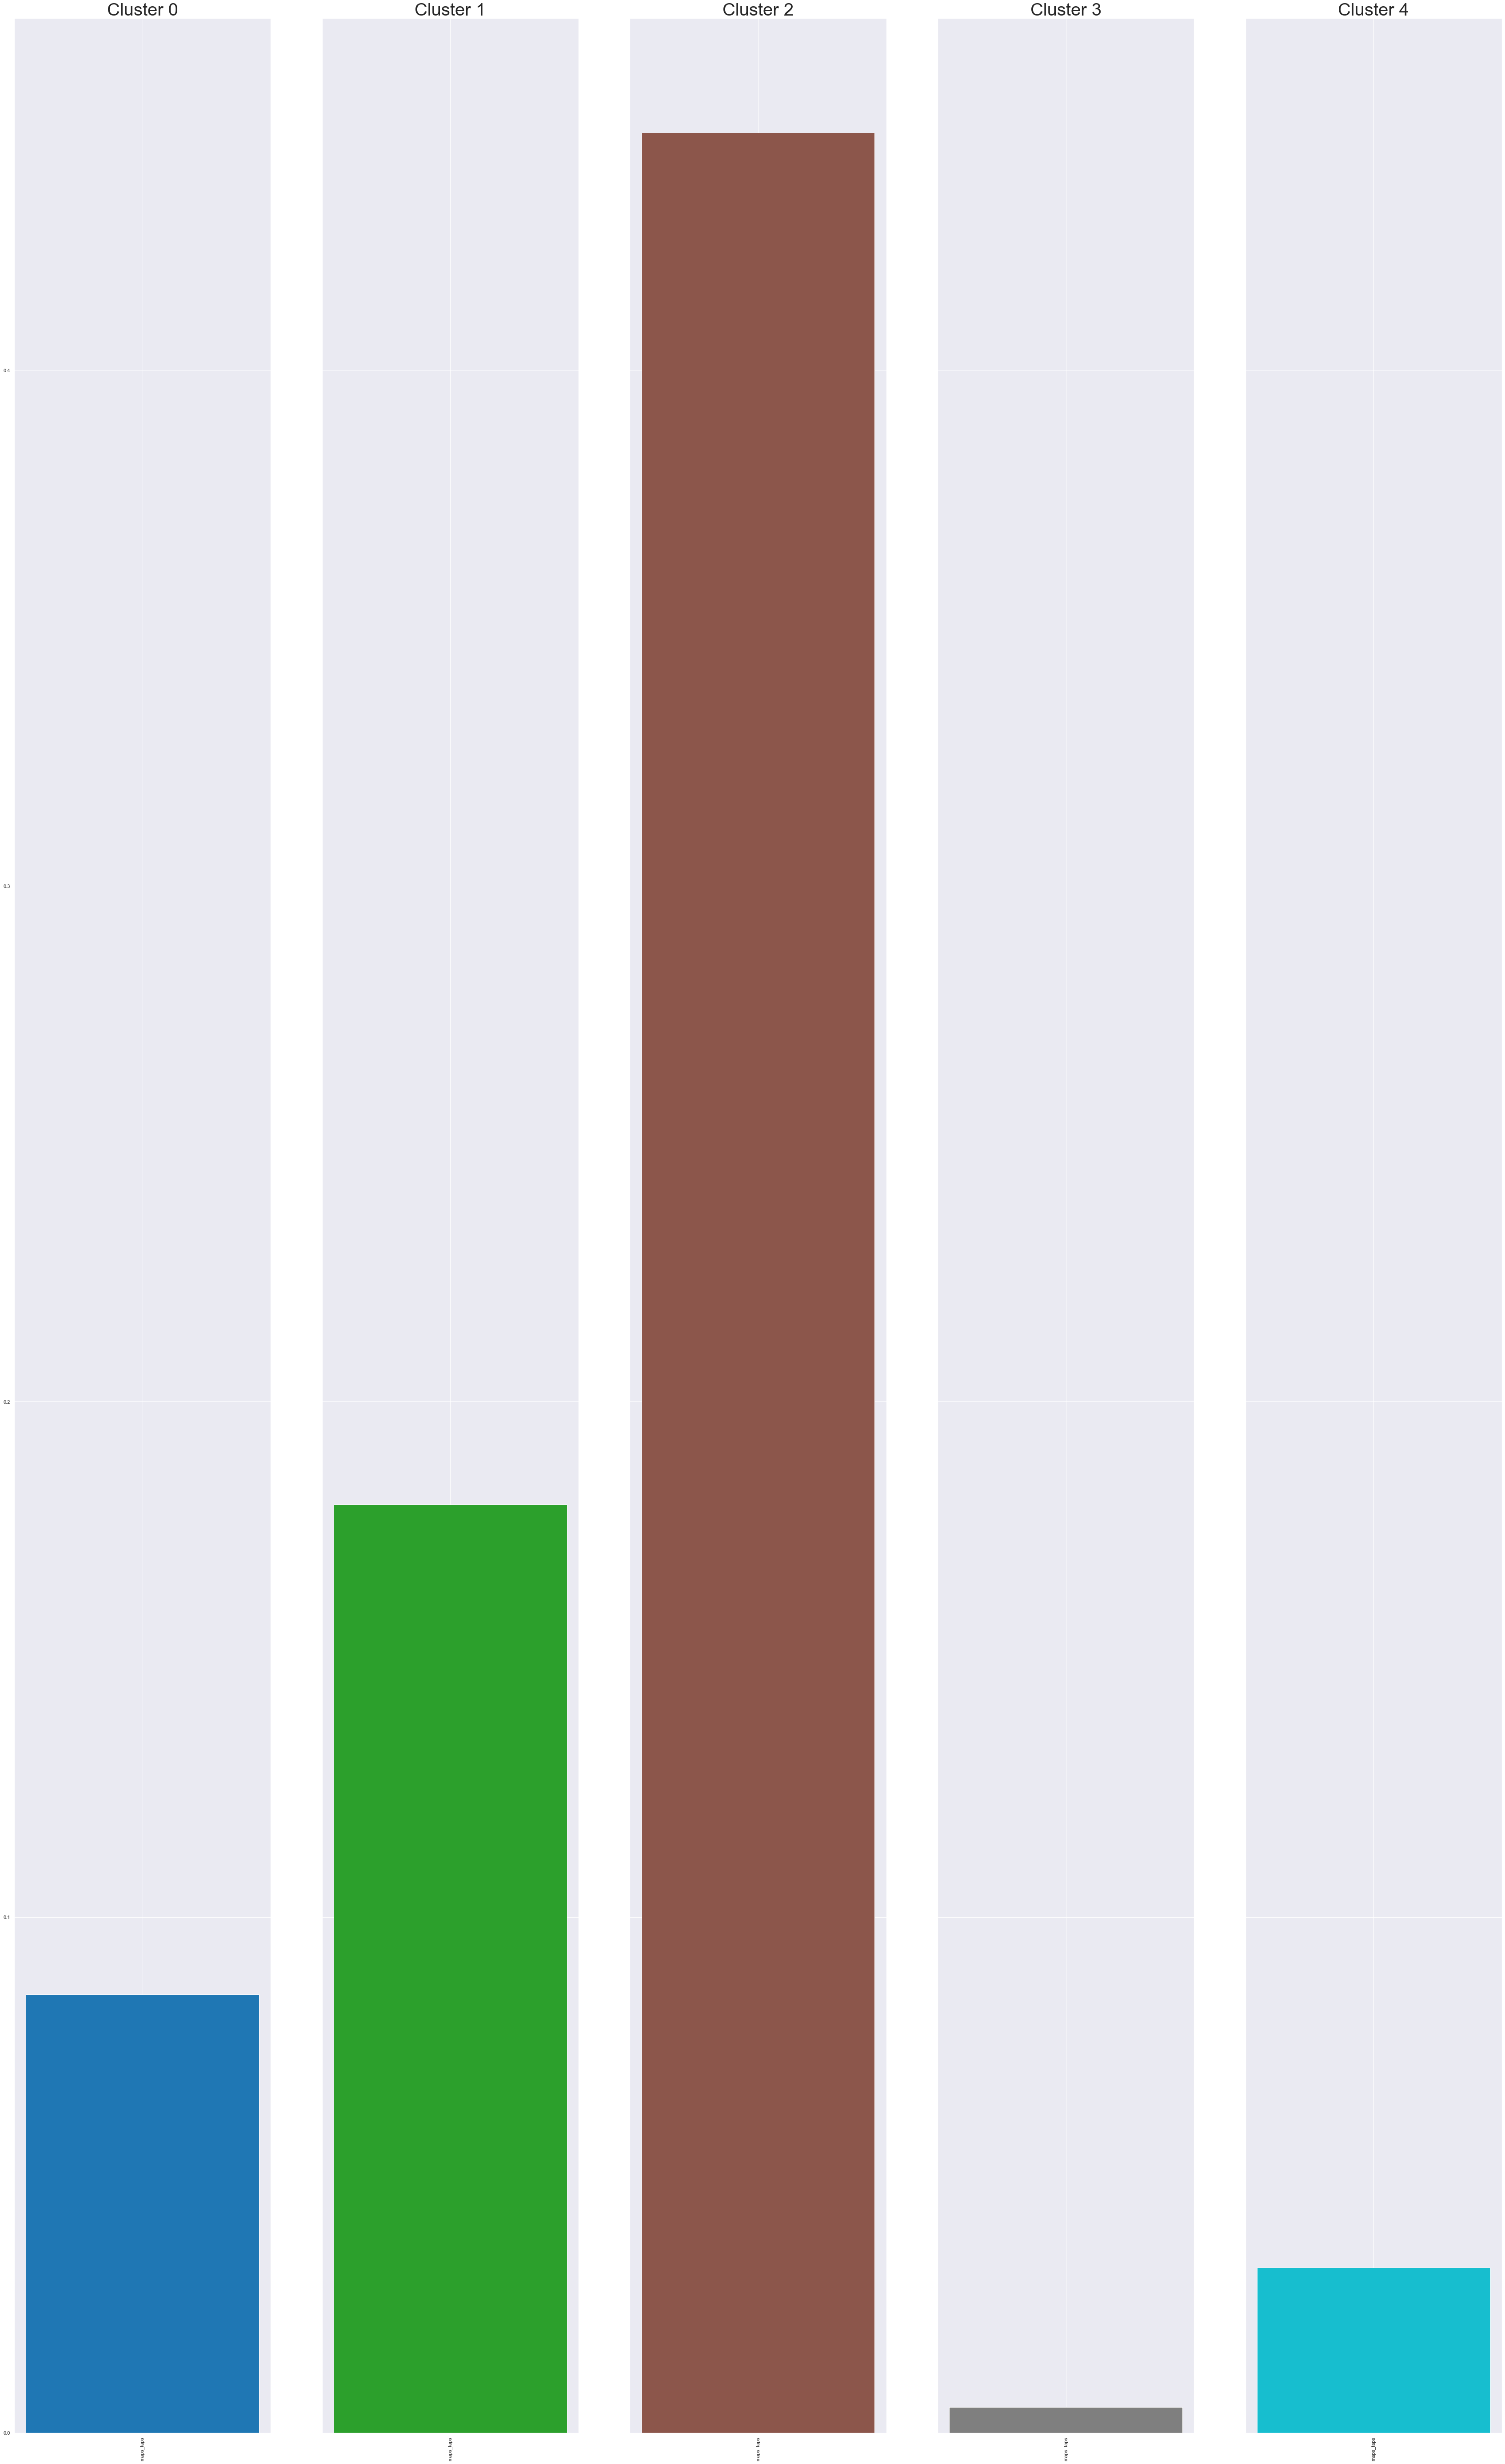

In [1761]:
#reset the index
agglom_means_T_aggm.reset_index(inplace=True)

#get the colours
colors = ["#1f77b4", "#2ca02c", "#8c564b", "#7f7f7f", "#17becf"]

#create subplots for each cluster
fig, ax = plt.subplots(1,5, figsize = (60,100), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T_aggm.columns):

    #ignore the index column
    if col != "index":
        print(col)
        ax = axis[i-1]
        print(ax)
        ##plot the bar chart
        ax.bar(height = agglom_means_T_aggm[col], x=agglom_means_T_aggm["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T_aggm["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 40)